# EDA

We do some exploratory data analysis on the datasets provided (rat_sightings_data, rat_inspection_data, catch_basin_data).

In [204]:
## Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import glob

In [205]:
path = r'data/cleaned_rat_inspection_data' 
all_files = glob.glob(os.path.join(path , "*.csv"))
rat_insp = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

rat_sight = pd.read_csv("data/rat_sightings_data/Rat_Sightings_Cleaned.csv")

catch_basin = pd.read_csv("data/catch_basin_data/NYC_catch_basin_citywide.csv")

In [206]:
display(rat_insp.sample(2))
display(rat_sight.sample(2))
display(catch_basin.sample(2))

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
2487868,Compliance,11385.0,40.703152,-73.874760,Queens,2015-01-07 16:00:08,Passed,01/15/2015 09:44:00 AM,"(40.703151675275, -73.874759725407)"
296414,Initial,11355.0,40.762205,-73.815306,Queens,2018-06-29 12:25:29,Failed for Other R,07/03/2018 09:28:45 AM,"(40.762204665304, -73.815306000284)"


,unique_key,created_date,closed_date,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,...,status,resolution_action_updated_date,community_board,borough,x_coordinate,y_coordinate,latitude,longitude,month,days_to_close
82384,54908753,2022-07-26 21:10:54,2022-07-26 21:10:54,catch_basin/sewer,11211.0,238 RODNEY STREET,RODNEY STREET,WILLIAMSBURG ST EAST,MARCY AVENUE,WILLIAMSBURG ST EAST,...,Closed,2022-07-26 21:10:54,01 BROOKLYN,BROOKLYN,"995,942","196,638",40.706395,-73.957829,7,0.0
110482,51265199,2021-07-20 09:02:54,2021-07-20 09:02:54,3+_family_apt._building,11216.0,705 ST MARKS AVENUE,ST MARKS AVENUE,NOSTRAND AVENUE,NEW YORK AVENUE,NOSTRAND AVENUE,...,Closed,2021-07-20 09:02:54,08 BROOKLYN,BROOKLYN,"998,345","185,262",40.675167,-73.949186,7,0.0


,the_geom,UNITID,LATITUDE,LONGITUDE,POINT_X,POINT_Y
65842,POINT (-73.95582891573126 40.60112560962384),CB312015,40.601126,-73.955829,"996,515.958798","158,285.761264"
148086,POINT (-74.07604973546034 40.588640053817684),CB560279,40.588640,-74.076050,"963,127.6459","153,743.0321"


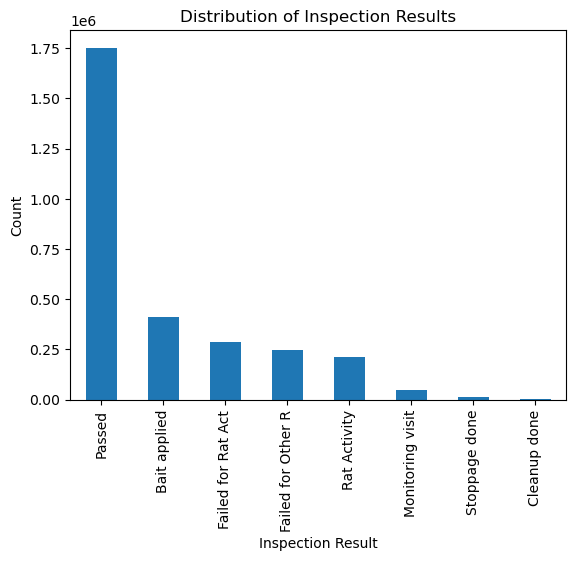

In [207]:
rat_insp.value_counts('result').plot(kind='bar')
plt.title('Distribution of Inspection Results')
plt.xlabel('Inspection Result')
plt.ylabel('Count')
plt.show()

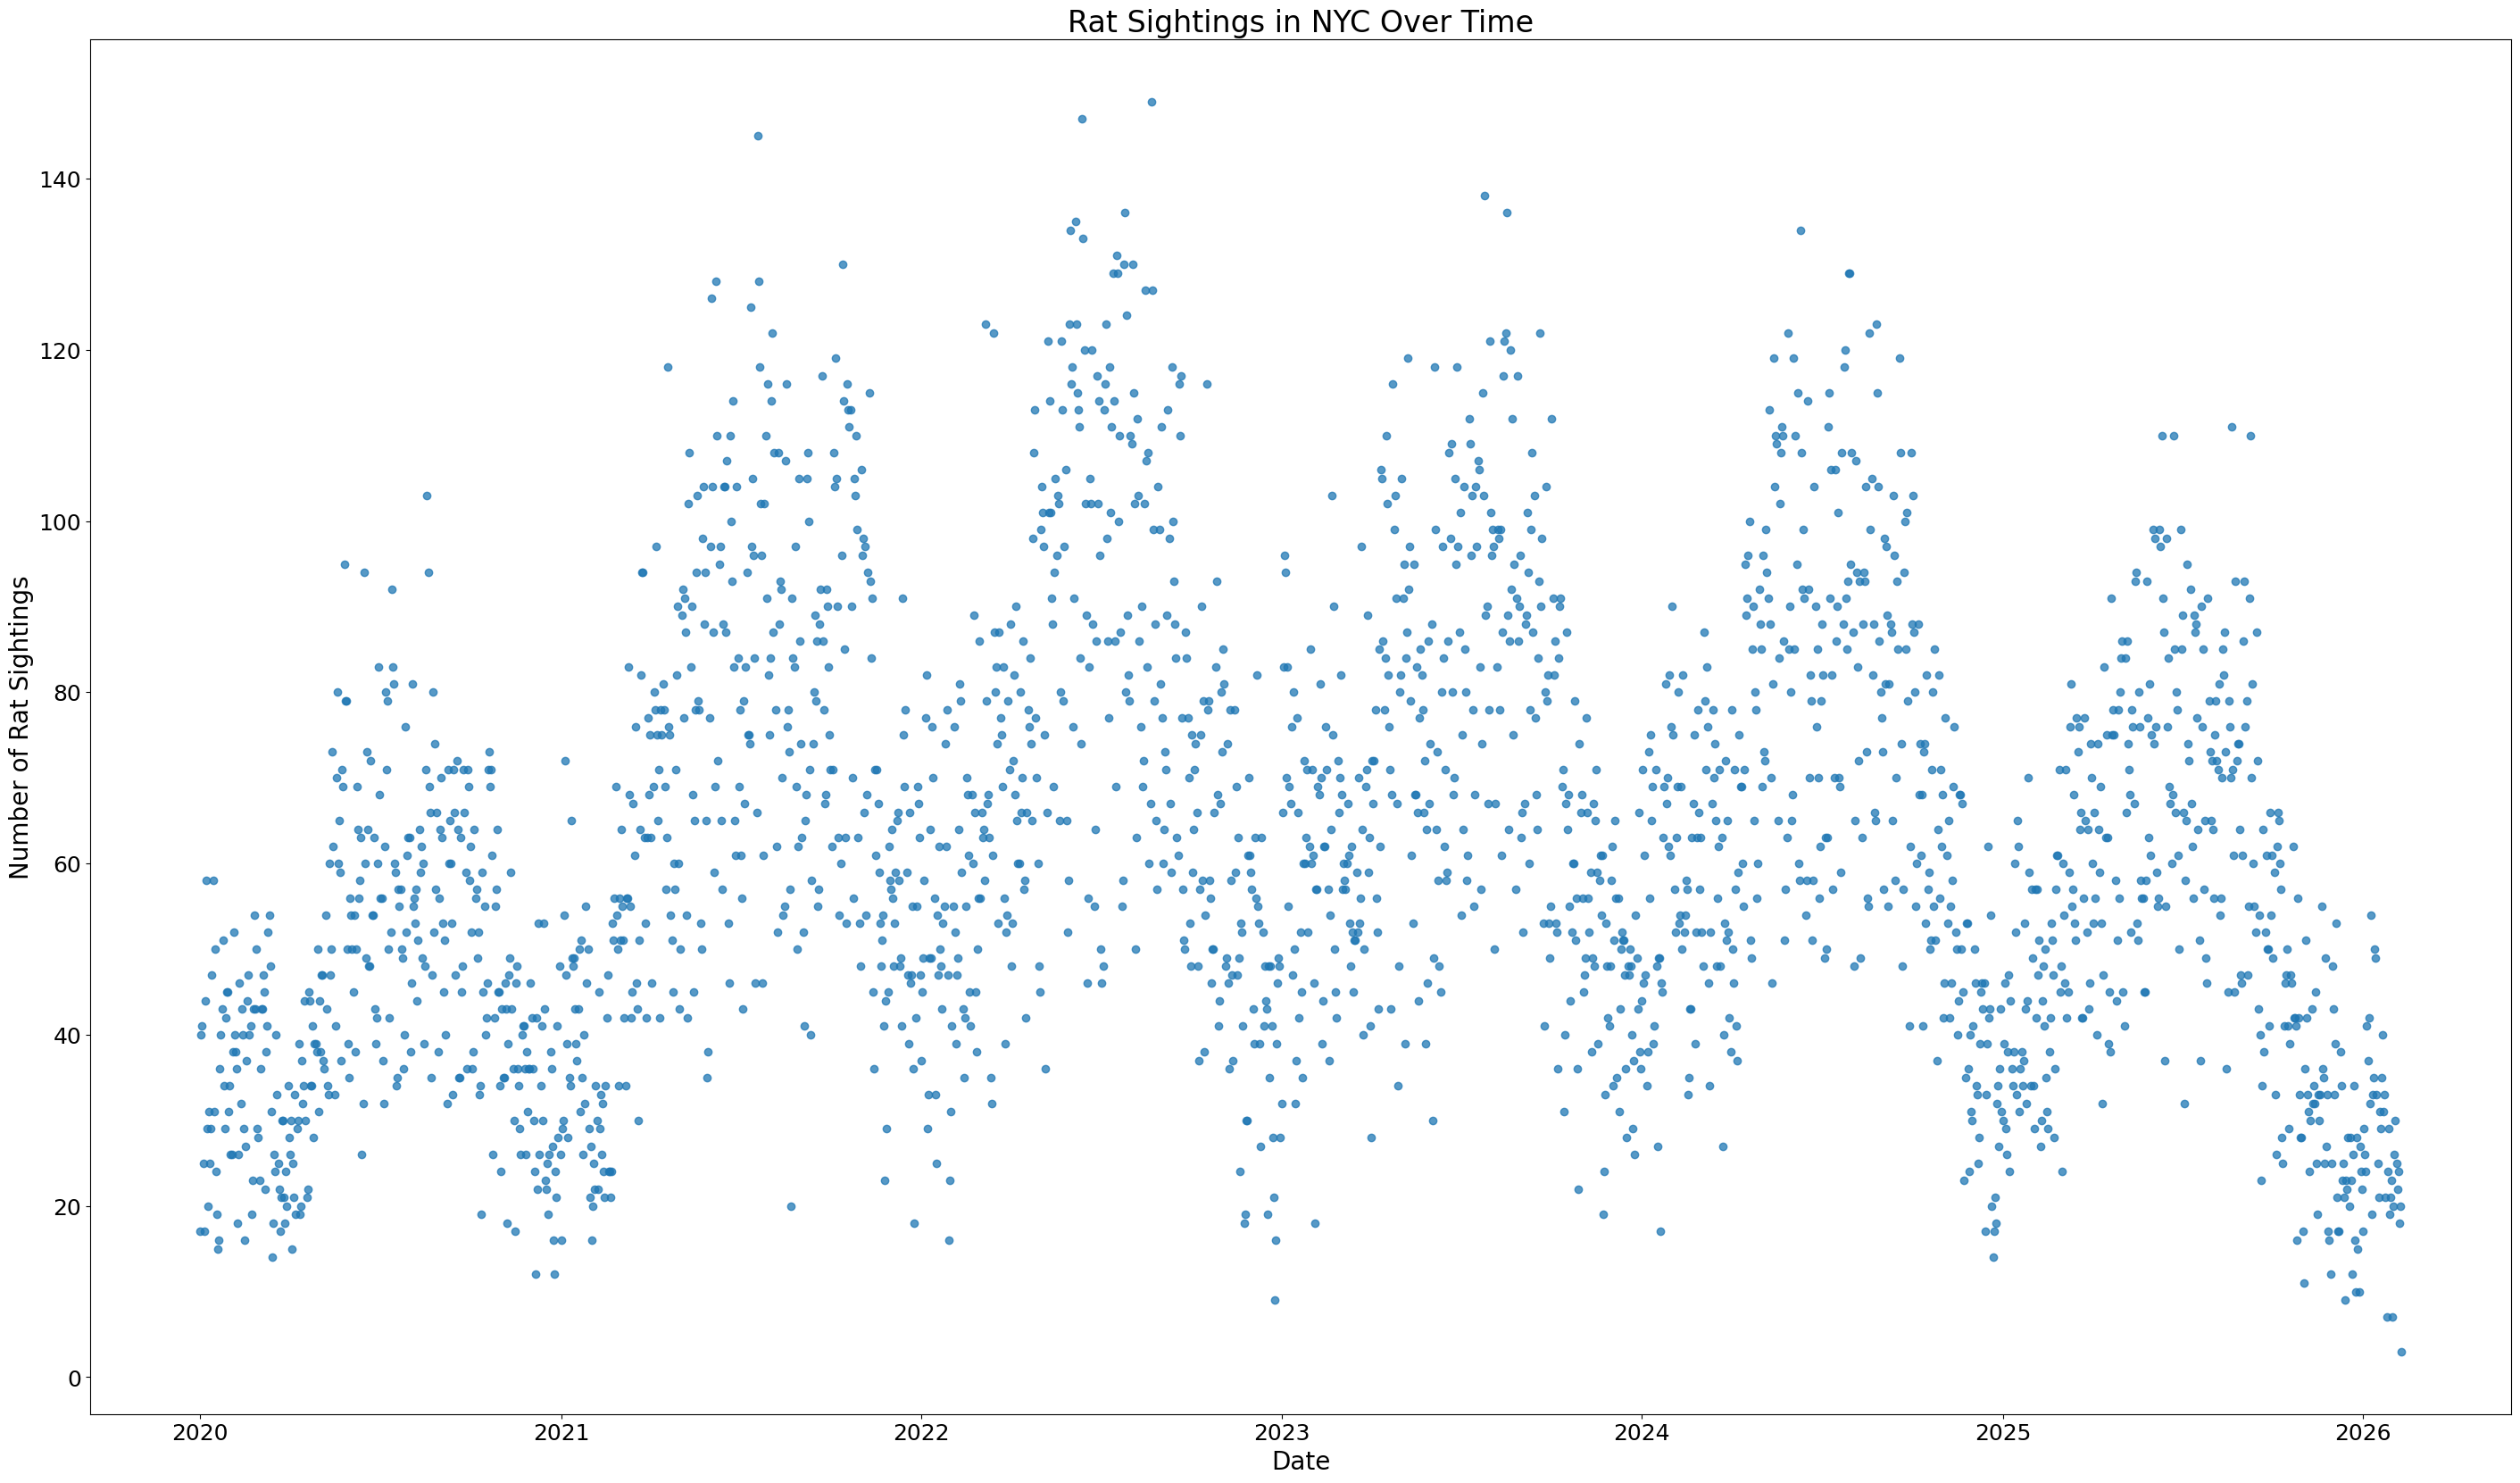

In [208]:
# convert created_date to datetime
rat_sight['created_date'] = pd.to_datetime(rat_sight['created_date'])

# Let's make a plot of the rat_sight data by date and borough. We use matplotlib for this.
cdate_rat = rat_sight.groupby(rat_sight['created_date'].dt.date).size().reset_index(name='count')

plt.figure(figsize=(35,20))
plt.plot(cdate_rat['created_date'], cdate_rat['count'], 'o', alpha=0.75)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Rat Sightings", fontsize=20)
plt.title("Rat Sightings in NYC Over Time", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

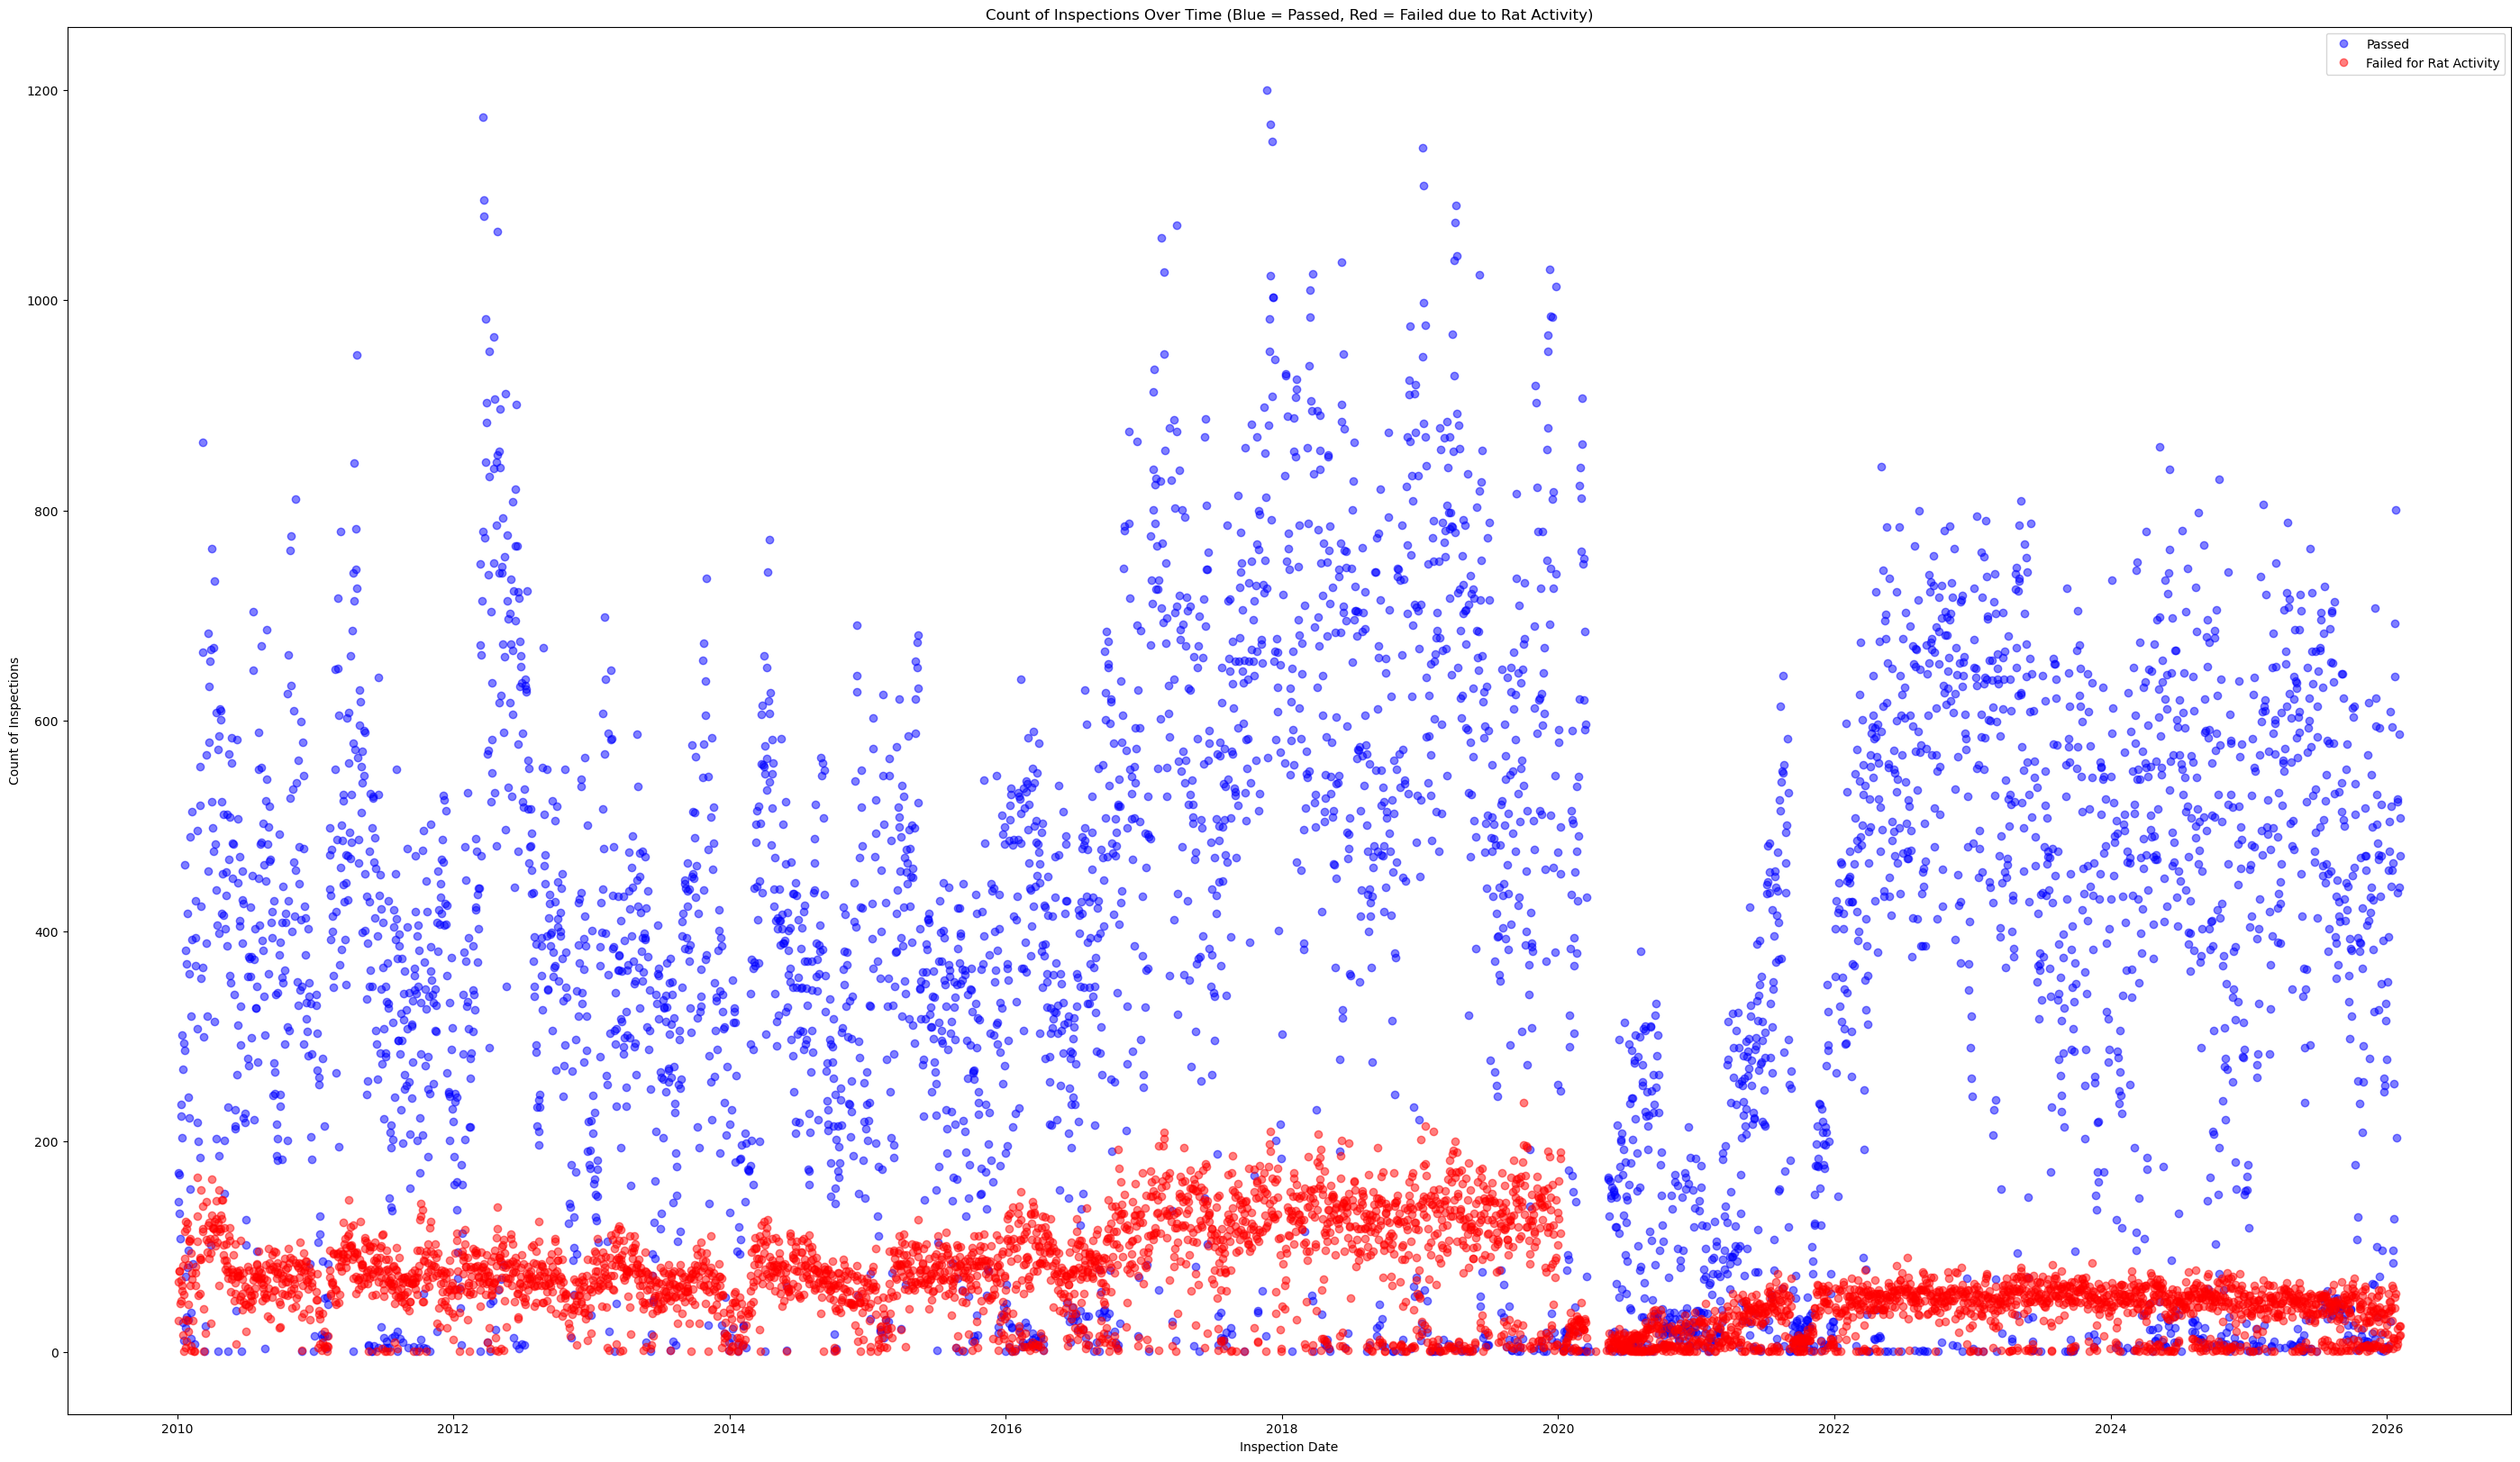

In [209]:
# now let's plot the rat_insepection data by date and borough.

rat_insp['inspection_date'] = pd.to_datetime(rat_insp['inspection_date'])

failed_rat_act = rat_insp[rat_insp['result'] == 'Failed for Rat Act']
failedidate = failed_rat_act.groupby(failed_rat_act['inspection_date'].dt.date).size().reset_index(name='count')

passed = rat_insp[rat_insp['result'] == 'Passed']
passidate = passed.groupby(passed['inspection_date'].dt.date).size().reset_index(name='count')


plt.figure(figsize=(35,20))
plt.plot(passidate['inspection_date'], passidate['count'], 'o', color="b", alpha=0.50)
plt.plot(failedidate['inspection_date'], failedidate['count'], 'o', color="r", alpha=0.50)
plt.xlabel('Inspection Date')
plt.ylabel('Count of Inspections')
plt.title('Count of Inspections Over Time (Blue = Passed, Red = Failed due to Rat Activity)')
plt.legend(['Passed', 'Failed for Rat Activity'])
plt.show()

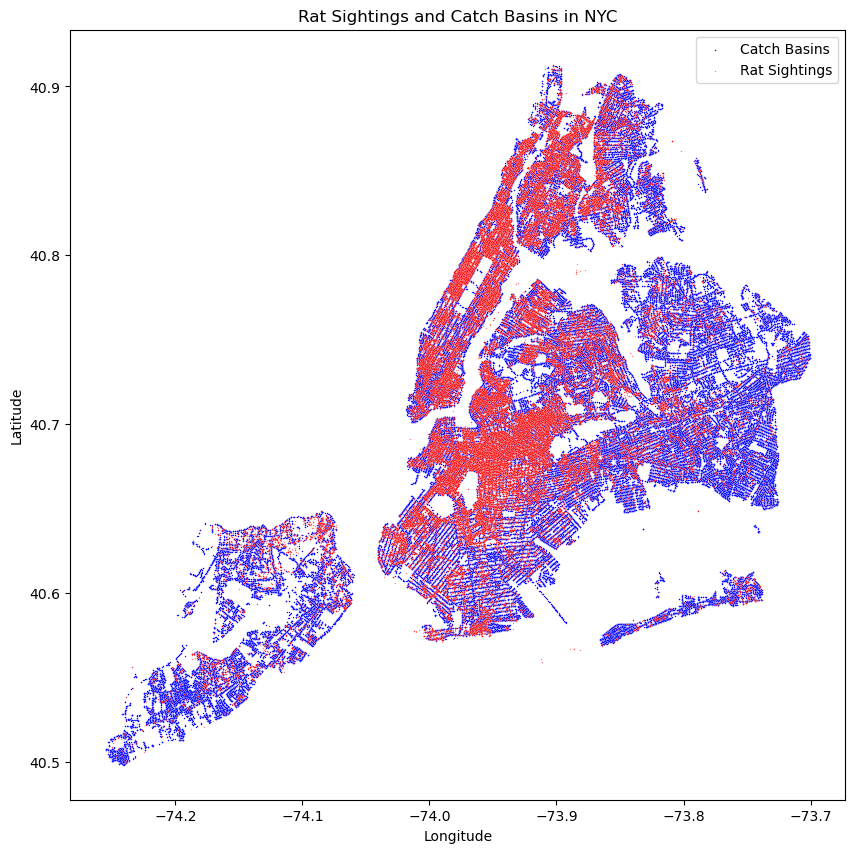

In [210]:
# Let's see if there is some correlation between rat sightings and locations of catch basins.
# We make a hexbin map which counts the number of rat sightings within a certain radius around a catch basin.
plt.figure(figsize=(10, 10))
sns.scatterplot(y=catch_basin['LATITUDE'], x=catch_basin['LONGITUDE'], color='blue', alpha=1, s=1, label='Catch Basins')
sns.scatterplot(y=rat_sight['latitude'], x=rat_sight['longitude'], color='red', alpha=0.5, s=1, label='Rat Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rat Sightings and Catch Basins in NYC')
plt.legend()
plt.show()

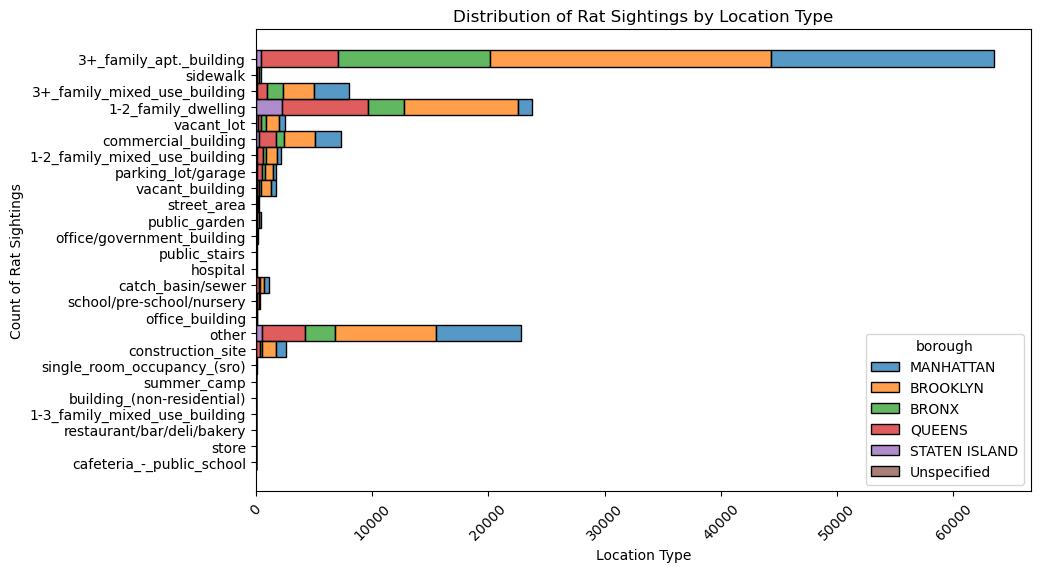

In [211]:
# Let's make a histogram of the number of rat sightings by building type.
# let's also color code the bar by the amount corresponding to which borough.
plt.figure(figsize=(10, 6))
sns.histplot(data=rat_sight, y='location_type', hue='borough', multiple="stack")
plt.xlabel('Location Type')
plt.ylabel('Count of Rat Sightings')
plt.title('Distribution of Rat Sightings by Location Type')
plt.xticks(rotation=45)
plt.show()

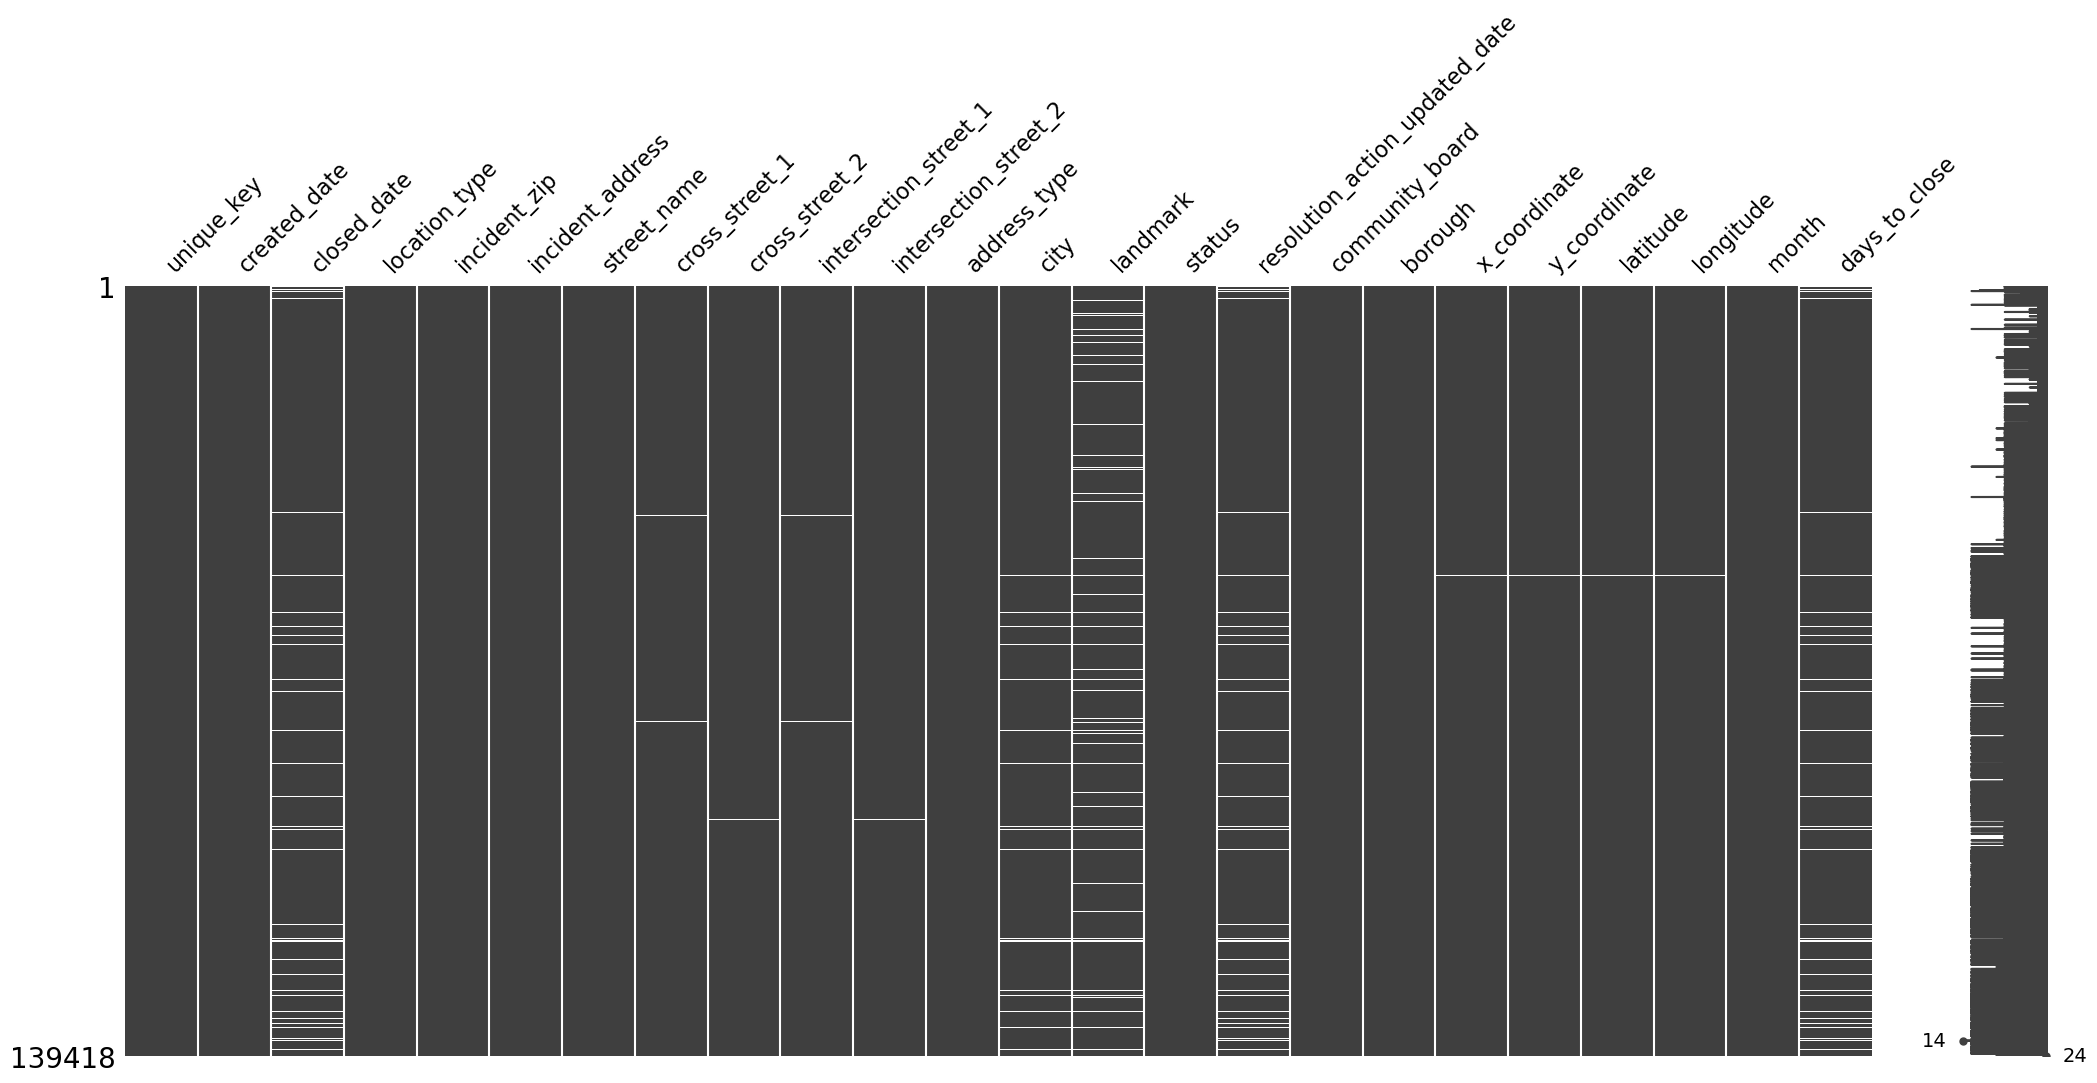

In [212]:
# Some missingness analysis

msno.matrix(rat_sight)
plt.show()

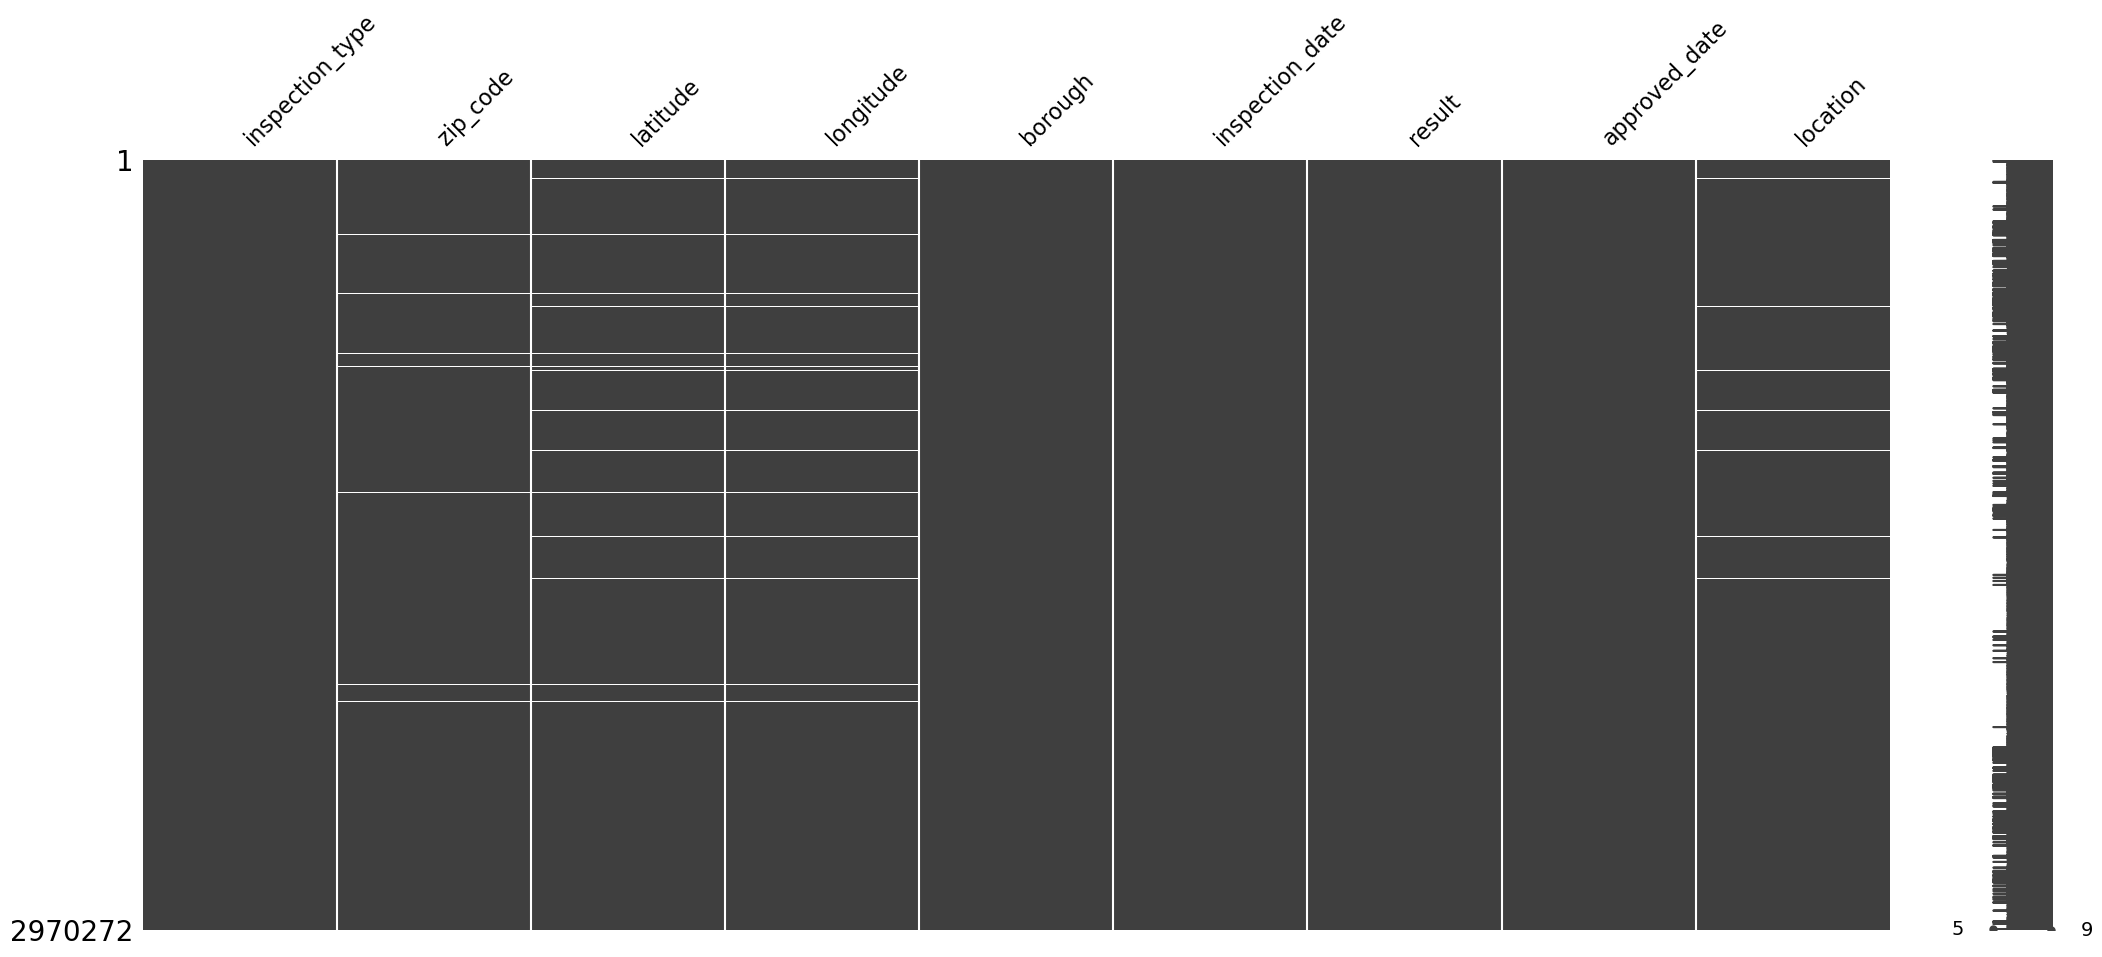

In [213]:
msno.matrix(rat_insp)
plt.show()

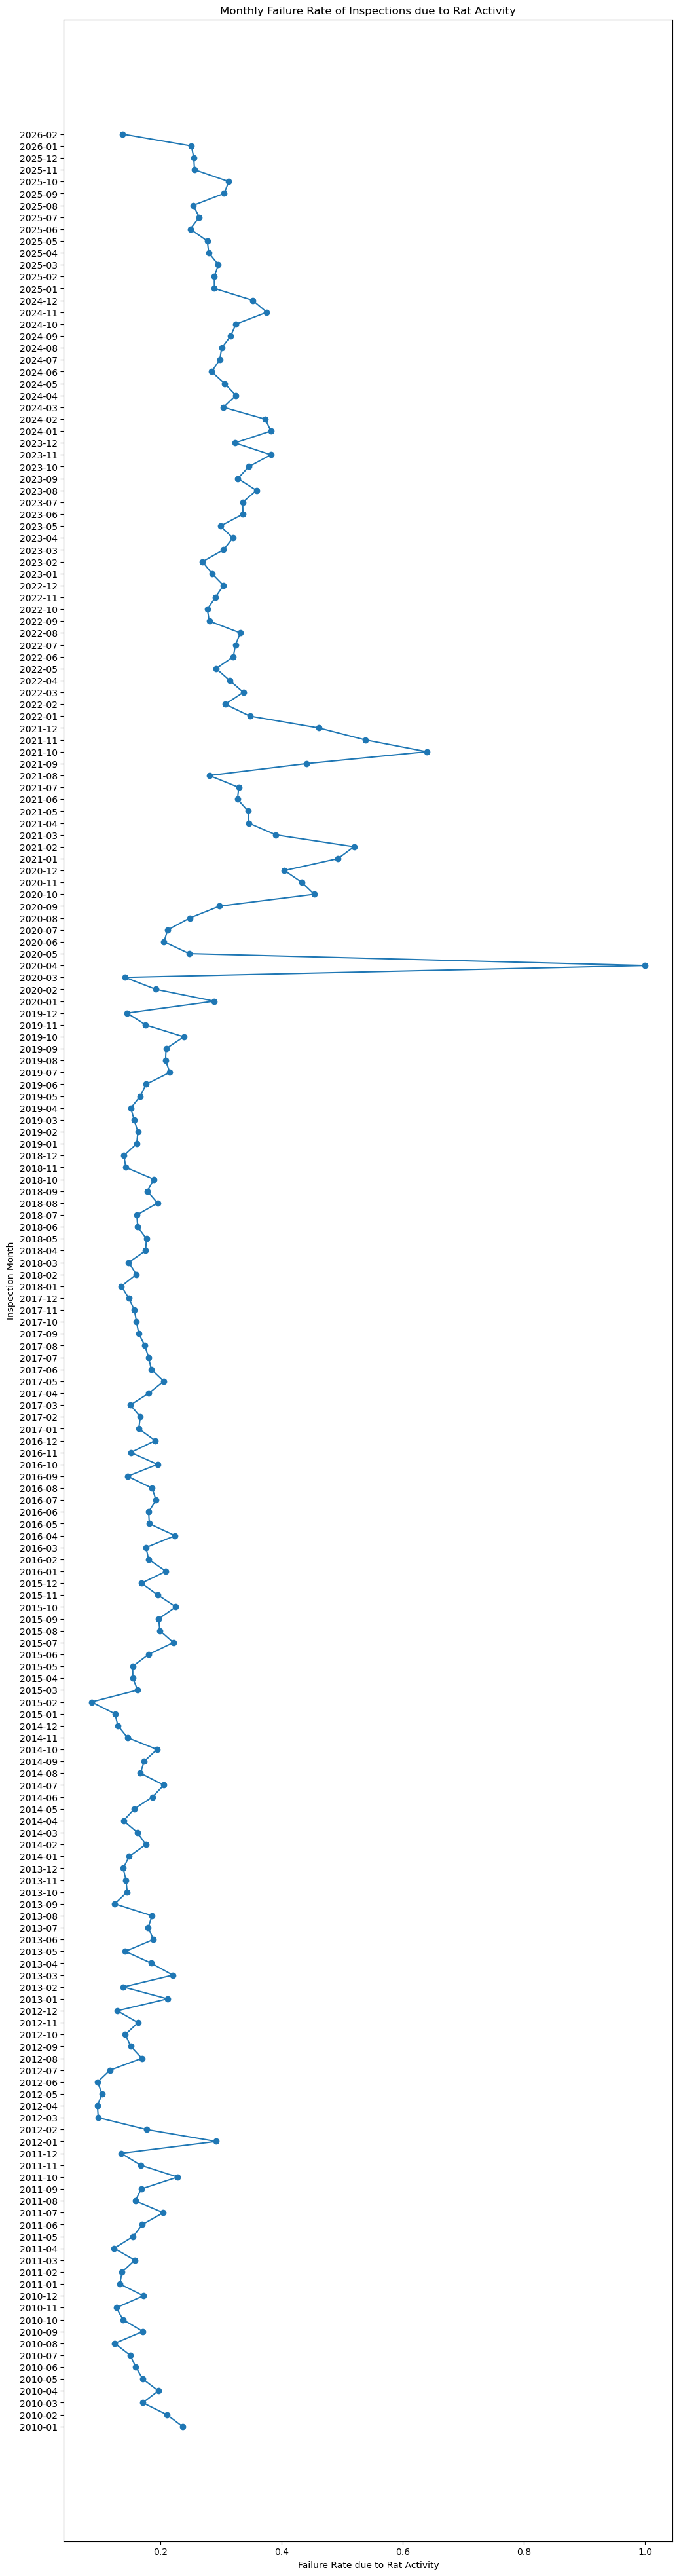

In [214]:
# going by month, let's plot the percentage of inspections that failed due to rat activity out of all inspections (but we ignore inspections that are not relevant to rat activity, such as those that failed due to other reasons or had a result of "Not Ready for Inspection" or "No Access").)
# need to make inspection month data
rat_insp['inspection_month'] = rat_insp['inspection_date'].dt.to_period('M')
rat_insp['is_failed_rat_act'] = (rat_insp['result'] == 'Failed for Rat Act') | (rat_insp['result'] == 'Rat Activity')

## we drop all rows where the result is not "Passed" or "Failed for Rat Act" since those are not relevant to our analysis of rat activity.
new_rat_insp = rat_insp[rat_insp['result'].isin(['Passed', 'Failed for Rat Act', 'Rat Activity'])]
monthly_rat_failures = new_rat_insp.groupby('inspection_month')['is_failed_rat_act'].mean().reset_index(name='failure_rate')    
plt.figure(figsize=(12, 50))
plt.plot( monthly_rat_failures['failure_rate'], monthly_rat_failures['inspection_month'].astype(str), marker='o')
plt.ylabel('Inspection Month')
plt.xlabel('Failure Rate due to Rat Activity')
plt.title('Monthly Failure Rate of Inspections due to Rat Activity')
plt.show()

In [203]:
# Something weird is happening in April 2020. Let's display entries with that month to check.

# This looks like an outlier. There are very rarely this few inspections.
rat_insp[rat_insp['inspection_month'] == '2020-4']


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location,inspection_month,is_failed_rat_act
1121585,Treatments,10456.0,40.829869,-73.917167,Bronx,2020-04-16 16:30:00,Bait applied,04/27/2020 04:17:41 PM,"(40.829868949504, -73.917167146577)",2020-04,False
1130289,Compliance,10019.0,40.762597,-73.986831,Manhattan,2020-04-10 15:50:00,Rat Activity,04/10/2020 04:11:44 PM,"(40.762596811625, -73.986831225224)",2020-04,True
1135879,Compliance,10009.0,40.729090,-73.978258,Manhattan,2020-04-08 09:41:00,Failed for Rat Act,04/07/2020 10:16:00 AM,"(40.729090199098, -73.978257954306)",2020-04,True


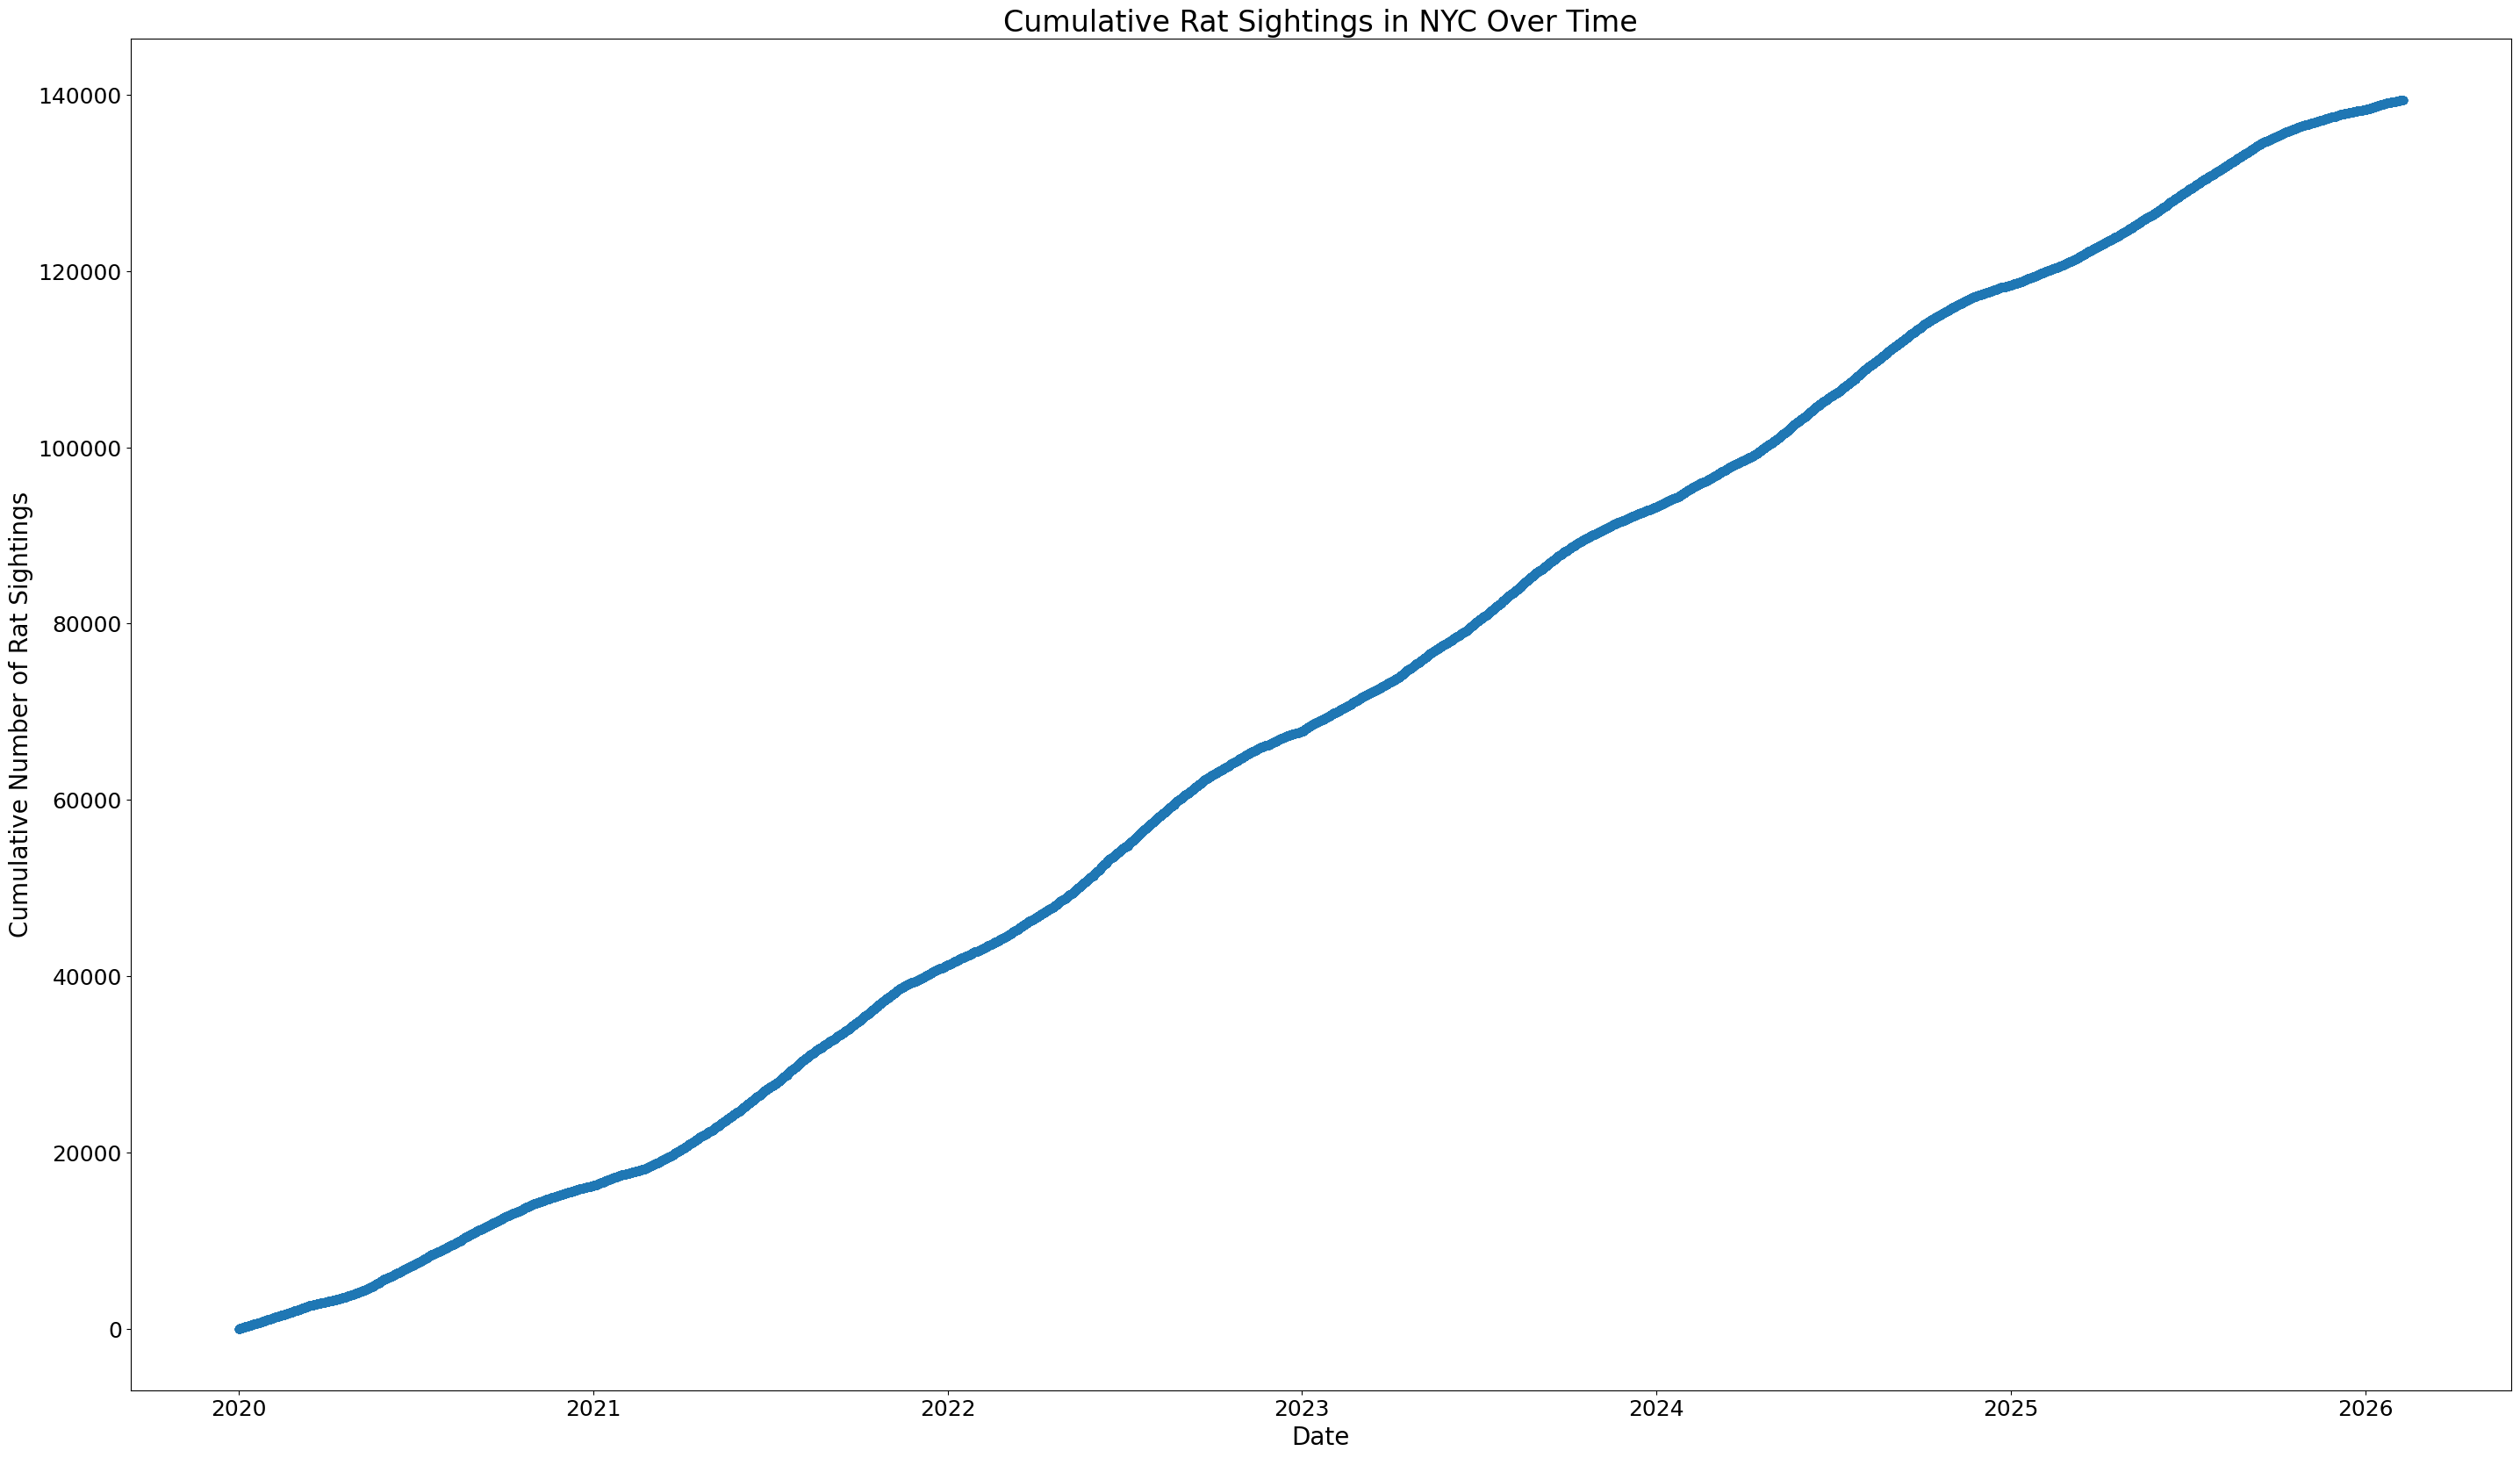

In [215]:
# Let's plot the cumulative number of rats seen since 2020.
rat_sight['created_date'] = pd.to_datetime(rat_sight['created_date'])
rat_sight = rat_sight.sort_values('created_date')
rat_sight['cumulative_count'] = np.arange(1, len(rat_sight) + 1)
plt.figure(figsize=(35,20))
plt.plot(rat_sight['created_date'], rat_sight['cumulative_count'], 'o', alpha=0.75)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Cumulative Number of Rat Sightings", fontsize=20)
plt.title("Cumulative Rat Sightings in NYC Over Time", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

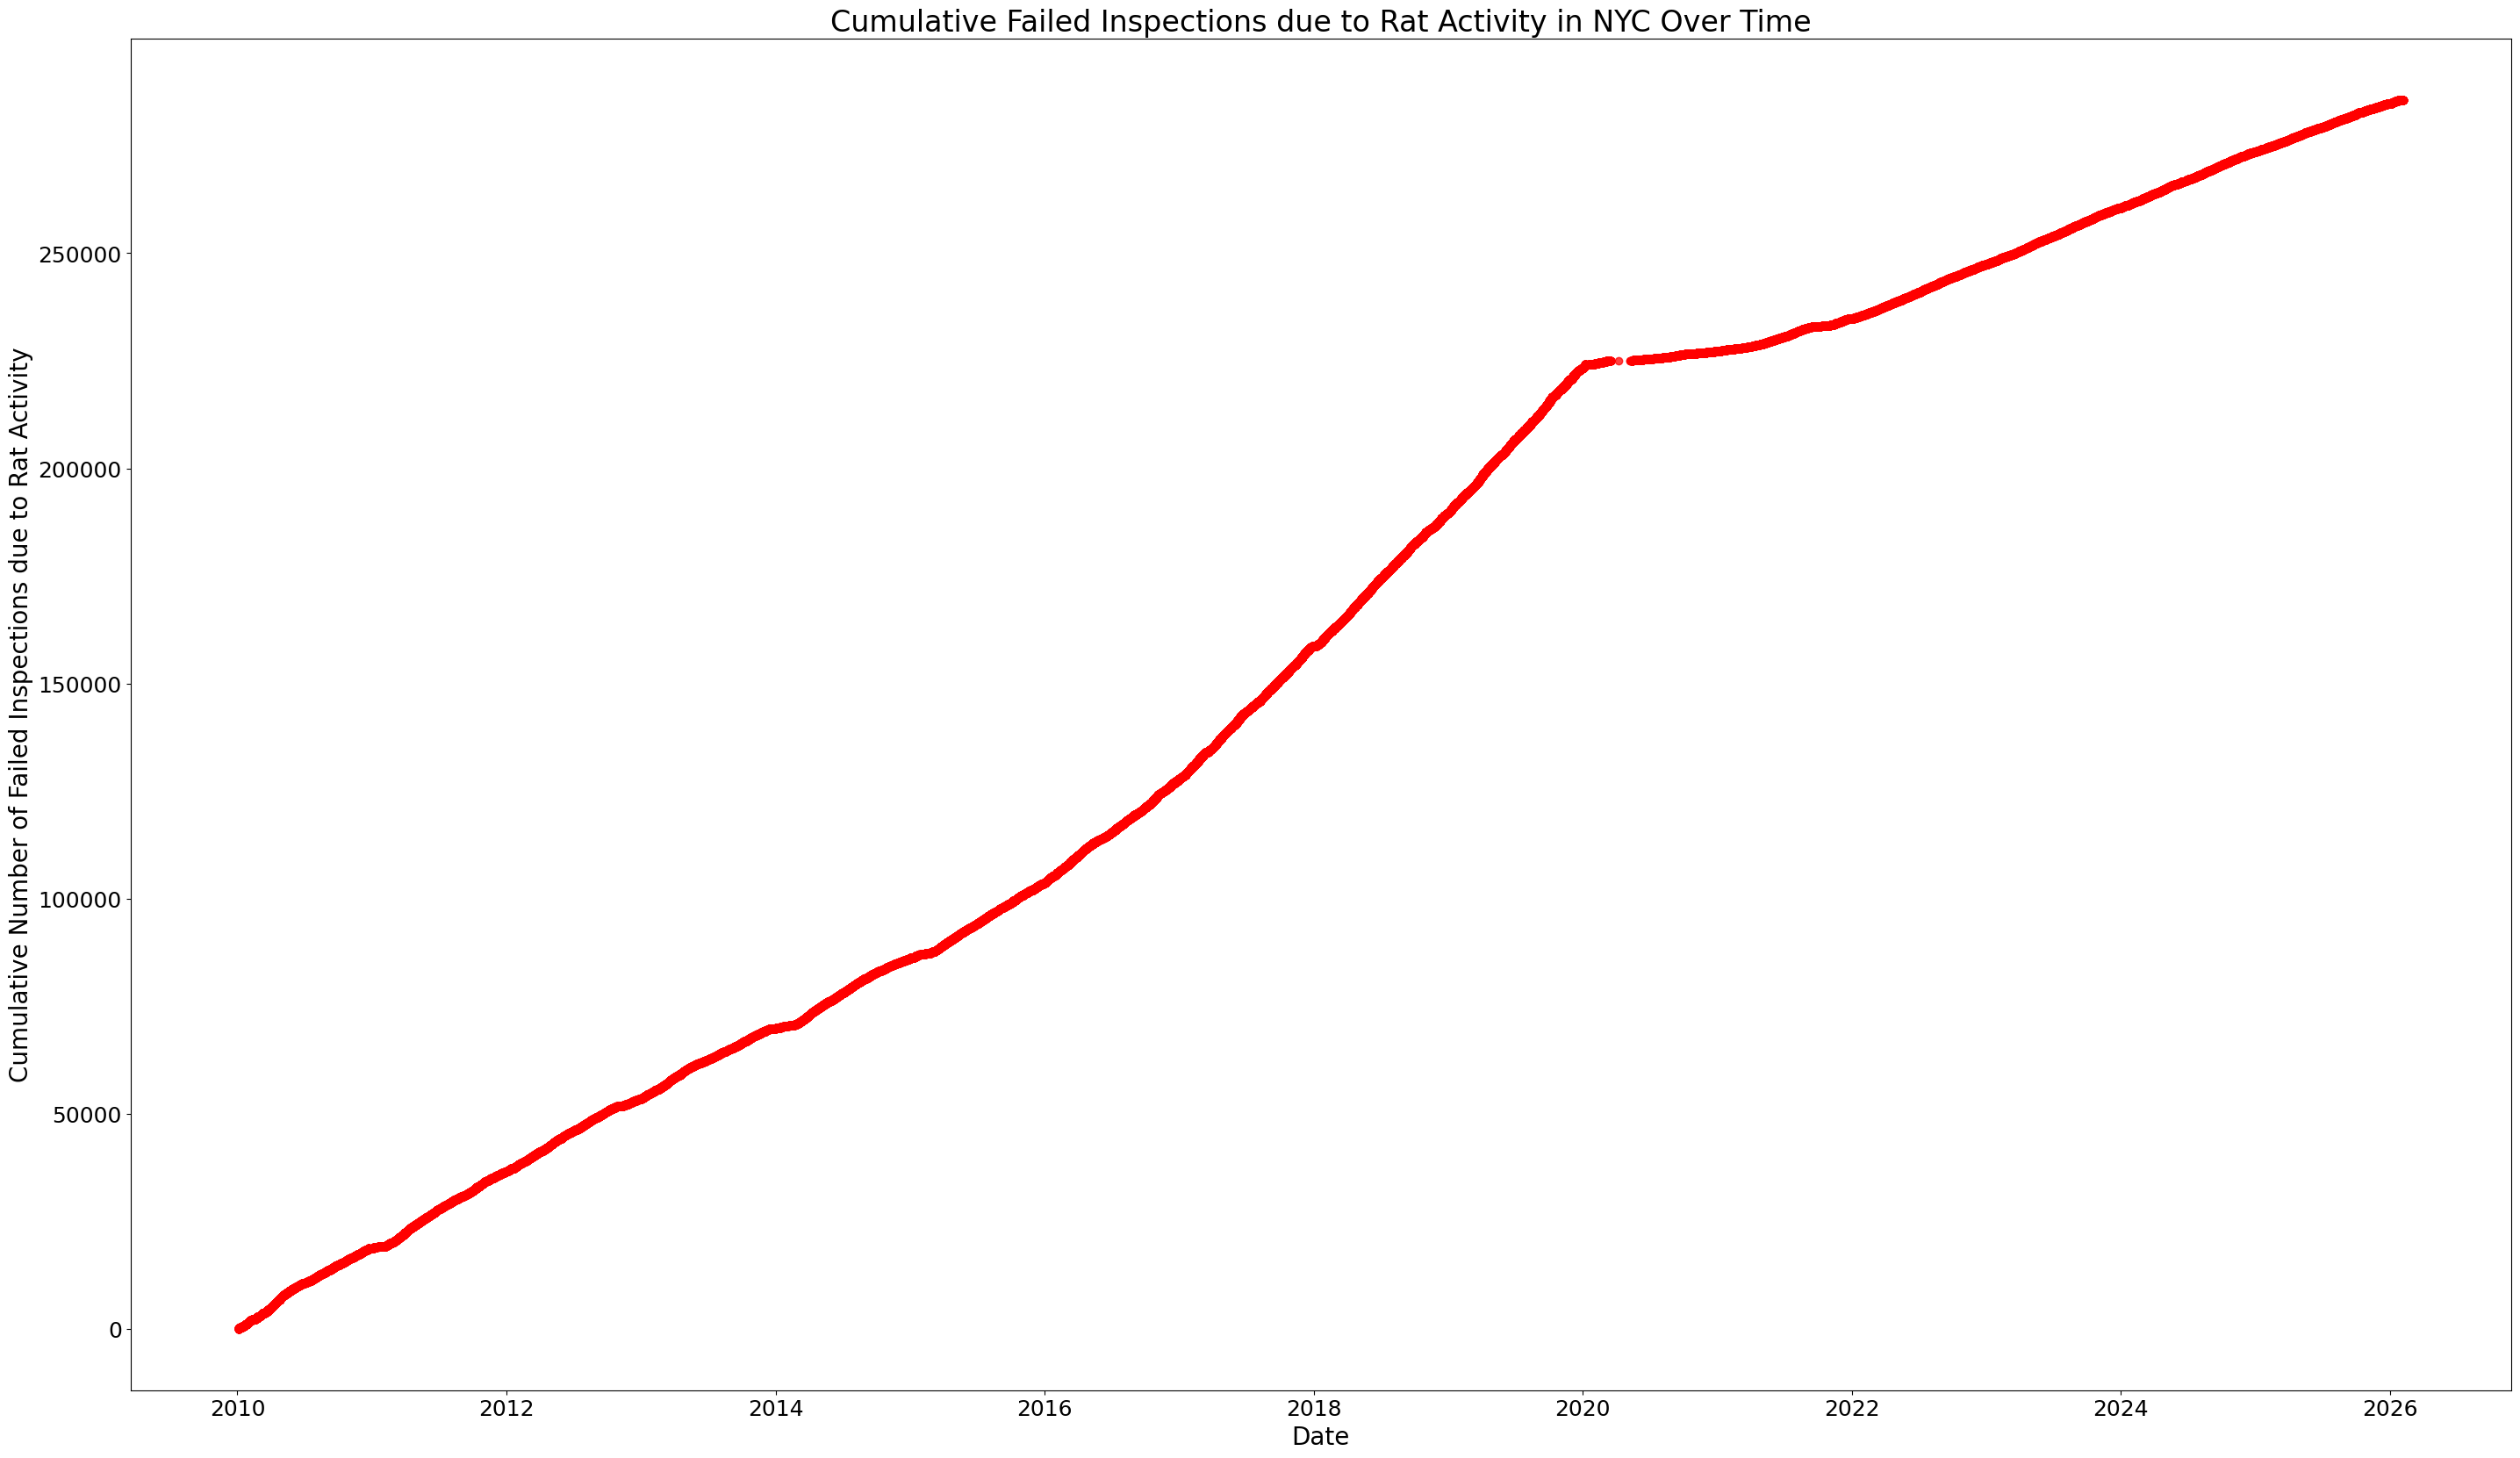

In [216]:
# Let's also plot the cumulative number of failed inspections due to rat activity since 2020.
failed_rat_act = rat_insp[rat_insp['result'] == 'Failed for Rat Act']
failed_rat_act = failed_rat_act.sort_values('inspection_date')
failed_rat_act['cumulative_failed'] = np.arange(1, len(failed_rat_act) + 1)
plt.figure(figsize=(35,20))
plt.plot(failed_rat_act['inspection_date'], failed_rat_act['cumulative_failed'], 'o', alpha=0.75, color='red')
plt.xlabel("Date", fontsize=20)
plt.ylabel("Cumulative Number of Failed Inspections due to Rat Activity", fontsize=20)
plt.title("Cumulative Failed Inspections due to Rat Activity in NYC Over Time", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

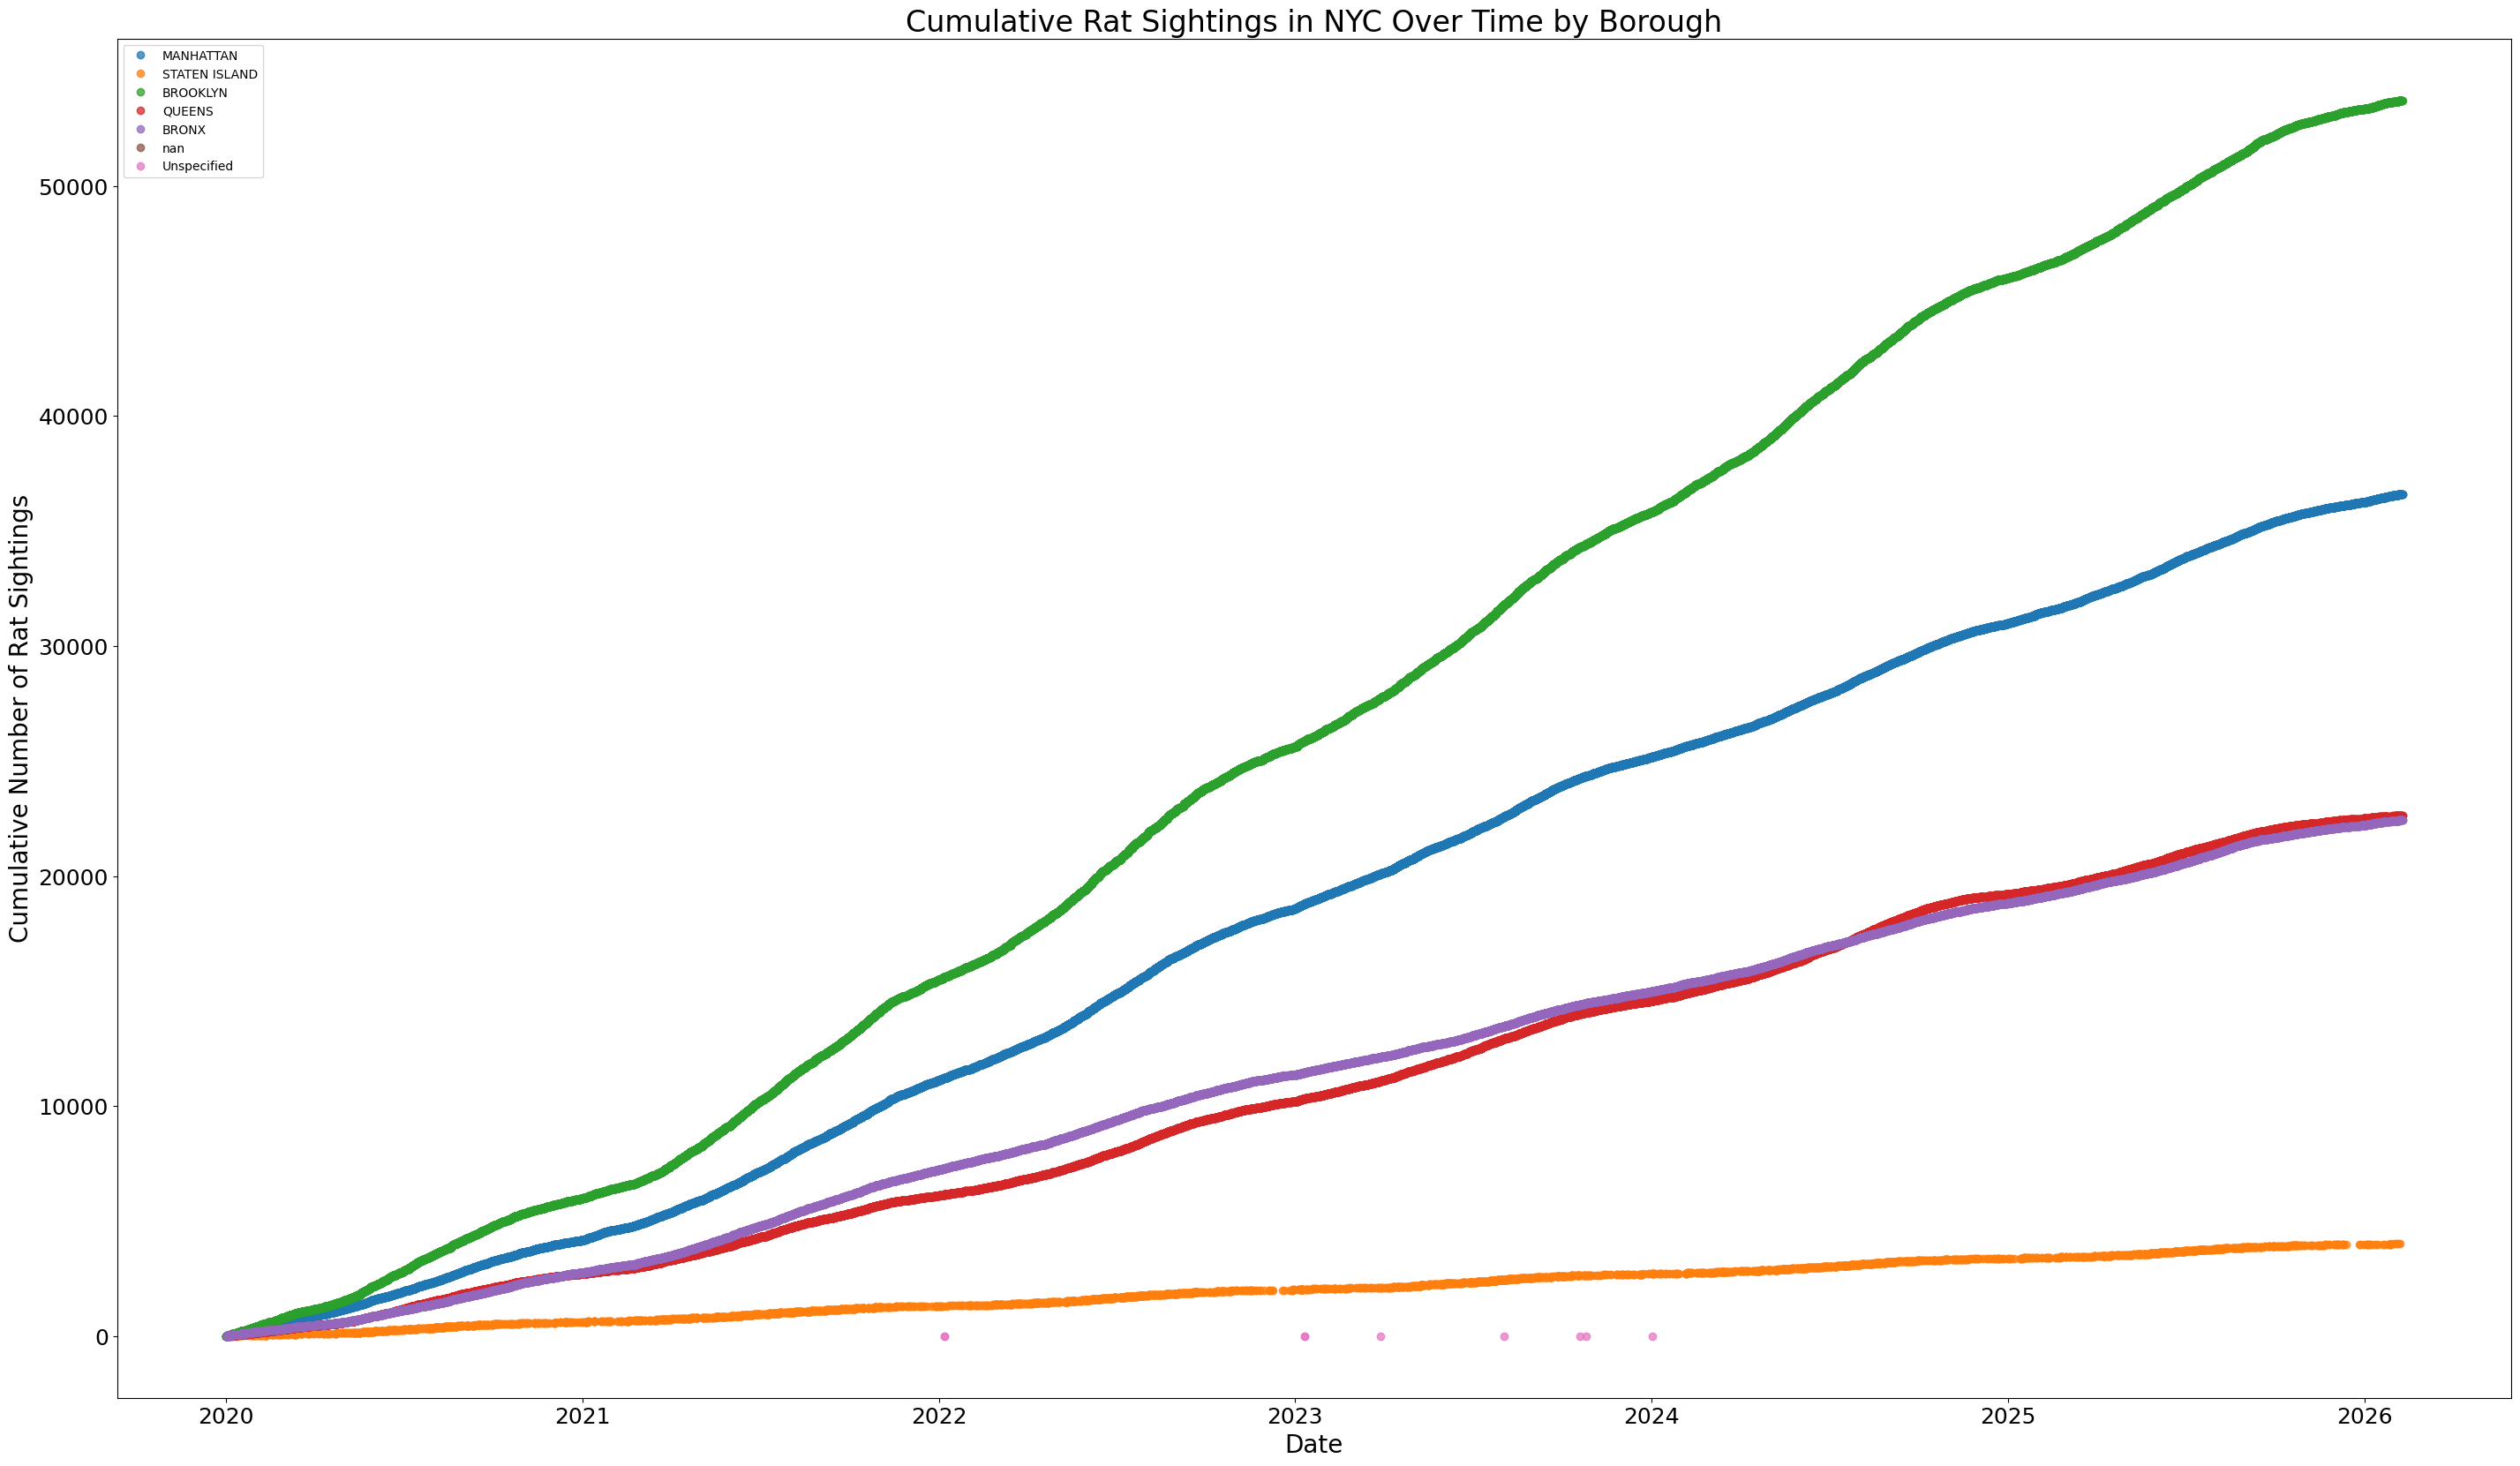

In [217]:
# Let's also separate the plots by borough. We do rat sightings first.
plt.figure(figsize=(35,20))
for borough in rat_sight['borough'].unique():
    borough_data = rat_sight[rat_sight['borough'] == borough]
    borough_data = borough_data.sort_values('created_date')
    borough_data['cumulative_count'] = np.arange(1, len(borough_data) + 1)
    plt.plot(borough_data['created_date'], borough_data['cumulative_count'], 'o', alpha=0.75, label=borough)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Cumulative Number of Rat Sightings", fontsize=20)
plt.title("Cumulative Rat Sightings in NYC Over Time by Borough", fontsize=24)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

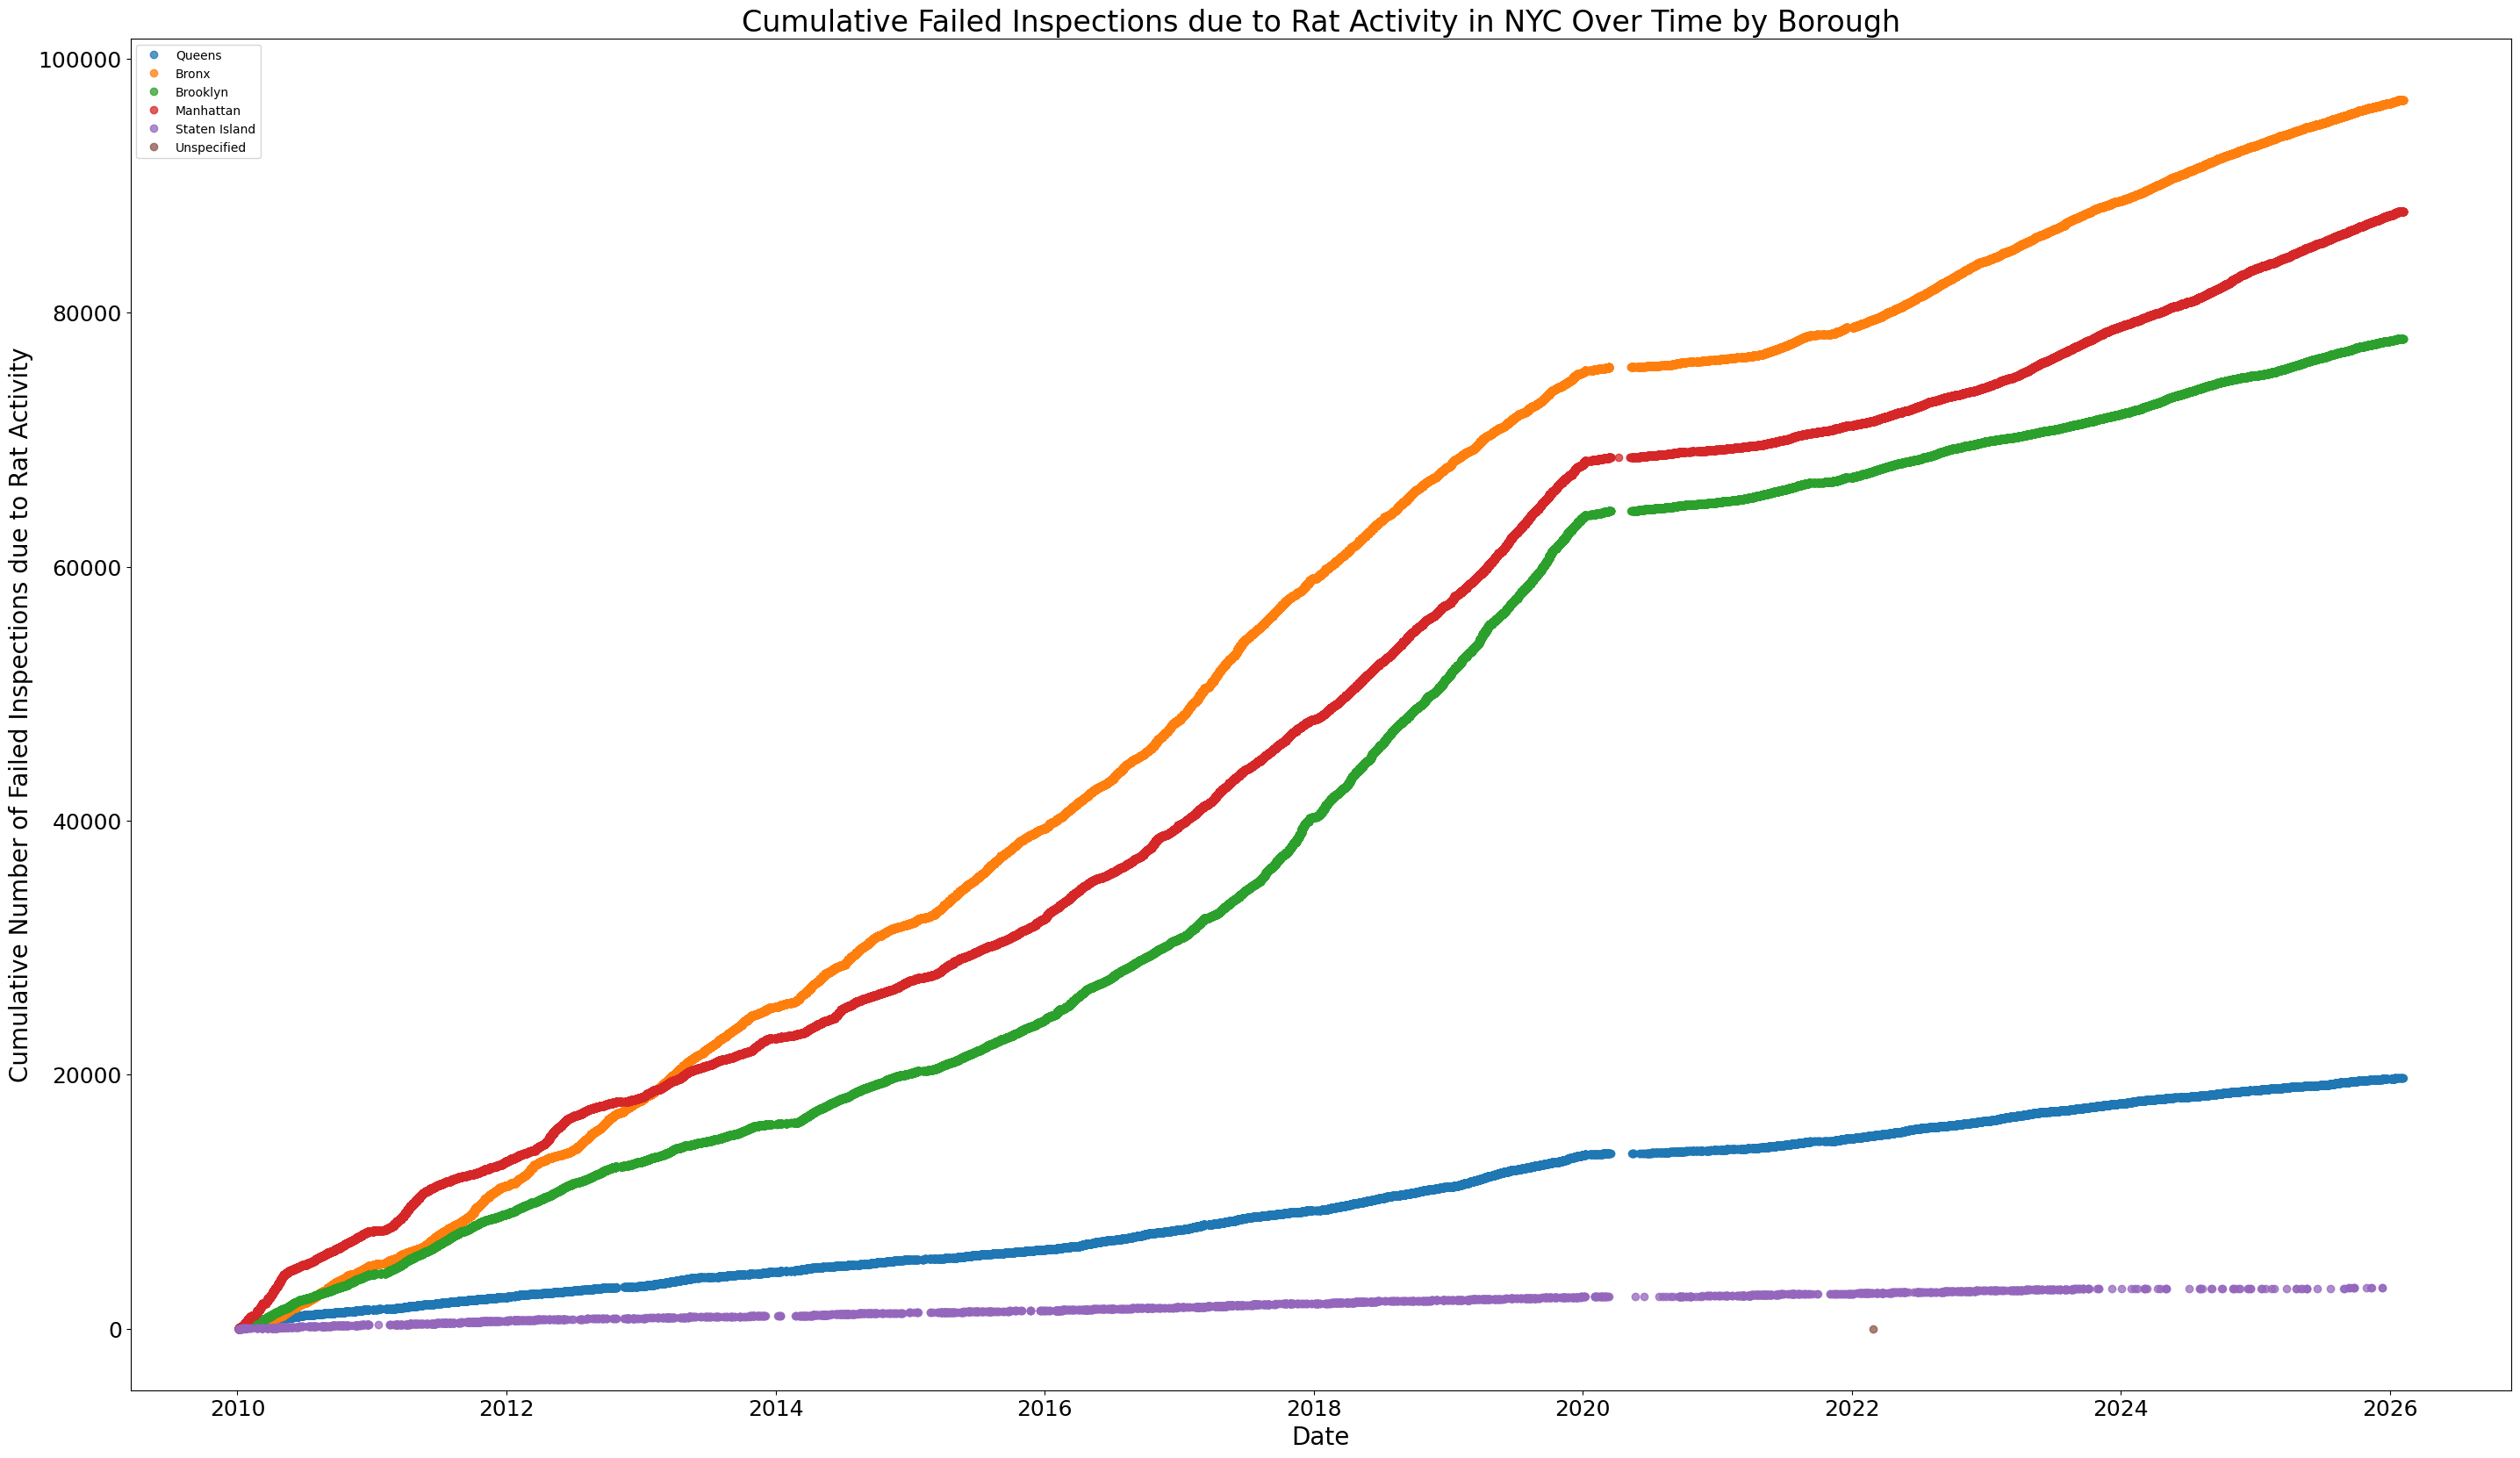

In [218]:
# Let's also do failed rat inspections by borough.
plt.figure(figsize=(35,20))
for borough in failed_rat_act['borough'].unique():
    borough_data = failed_rat_act[failed_rat_act['borough'] == borough]
    borough_data = borough_data.sort_values('inspection_date')
    borough_data['cumulative_failed'] = np.arange(1, len(borough_data) + 1)
    plt.plot(borough_data['inspection_date'], borough_data['cumulative_failed'], 'o', alpha=0.75, label=borough)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Cumulative Number of Failed Inspections due to Rat Activity", fontsize=20)
plt.title("Cumulative Failed Inspections due to Rat Activity in NYC Over Time by Borough", fontsize=24)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

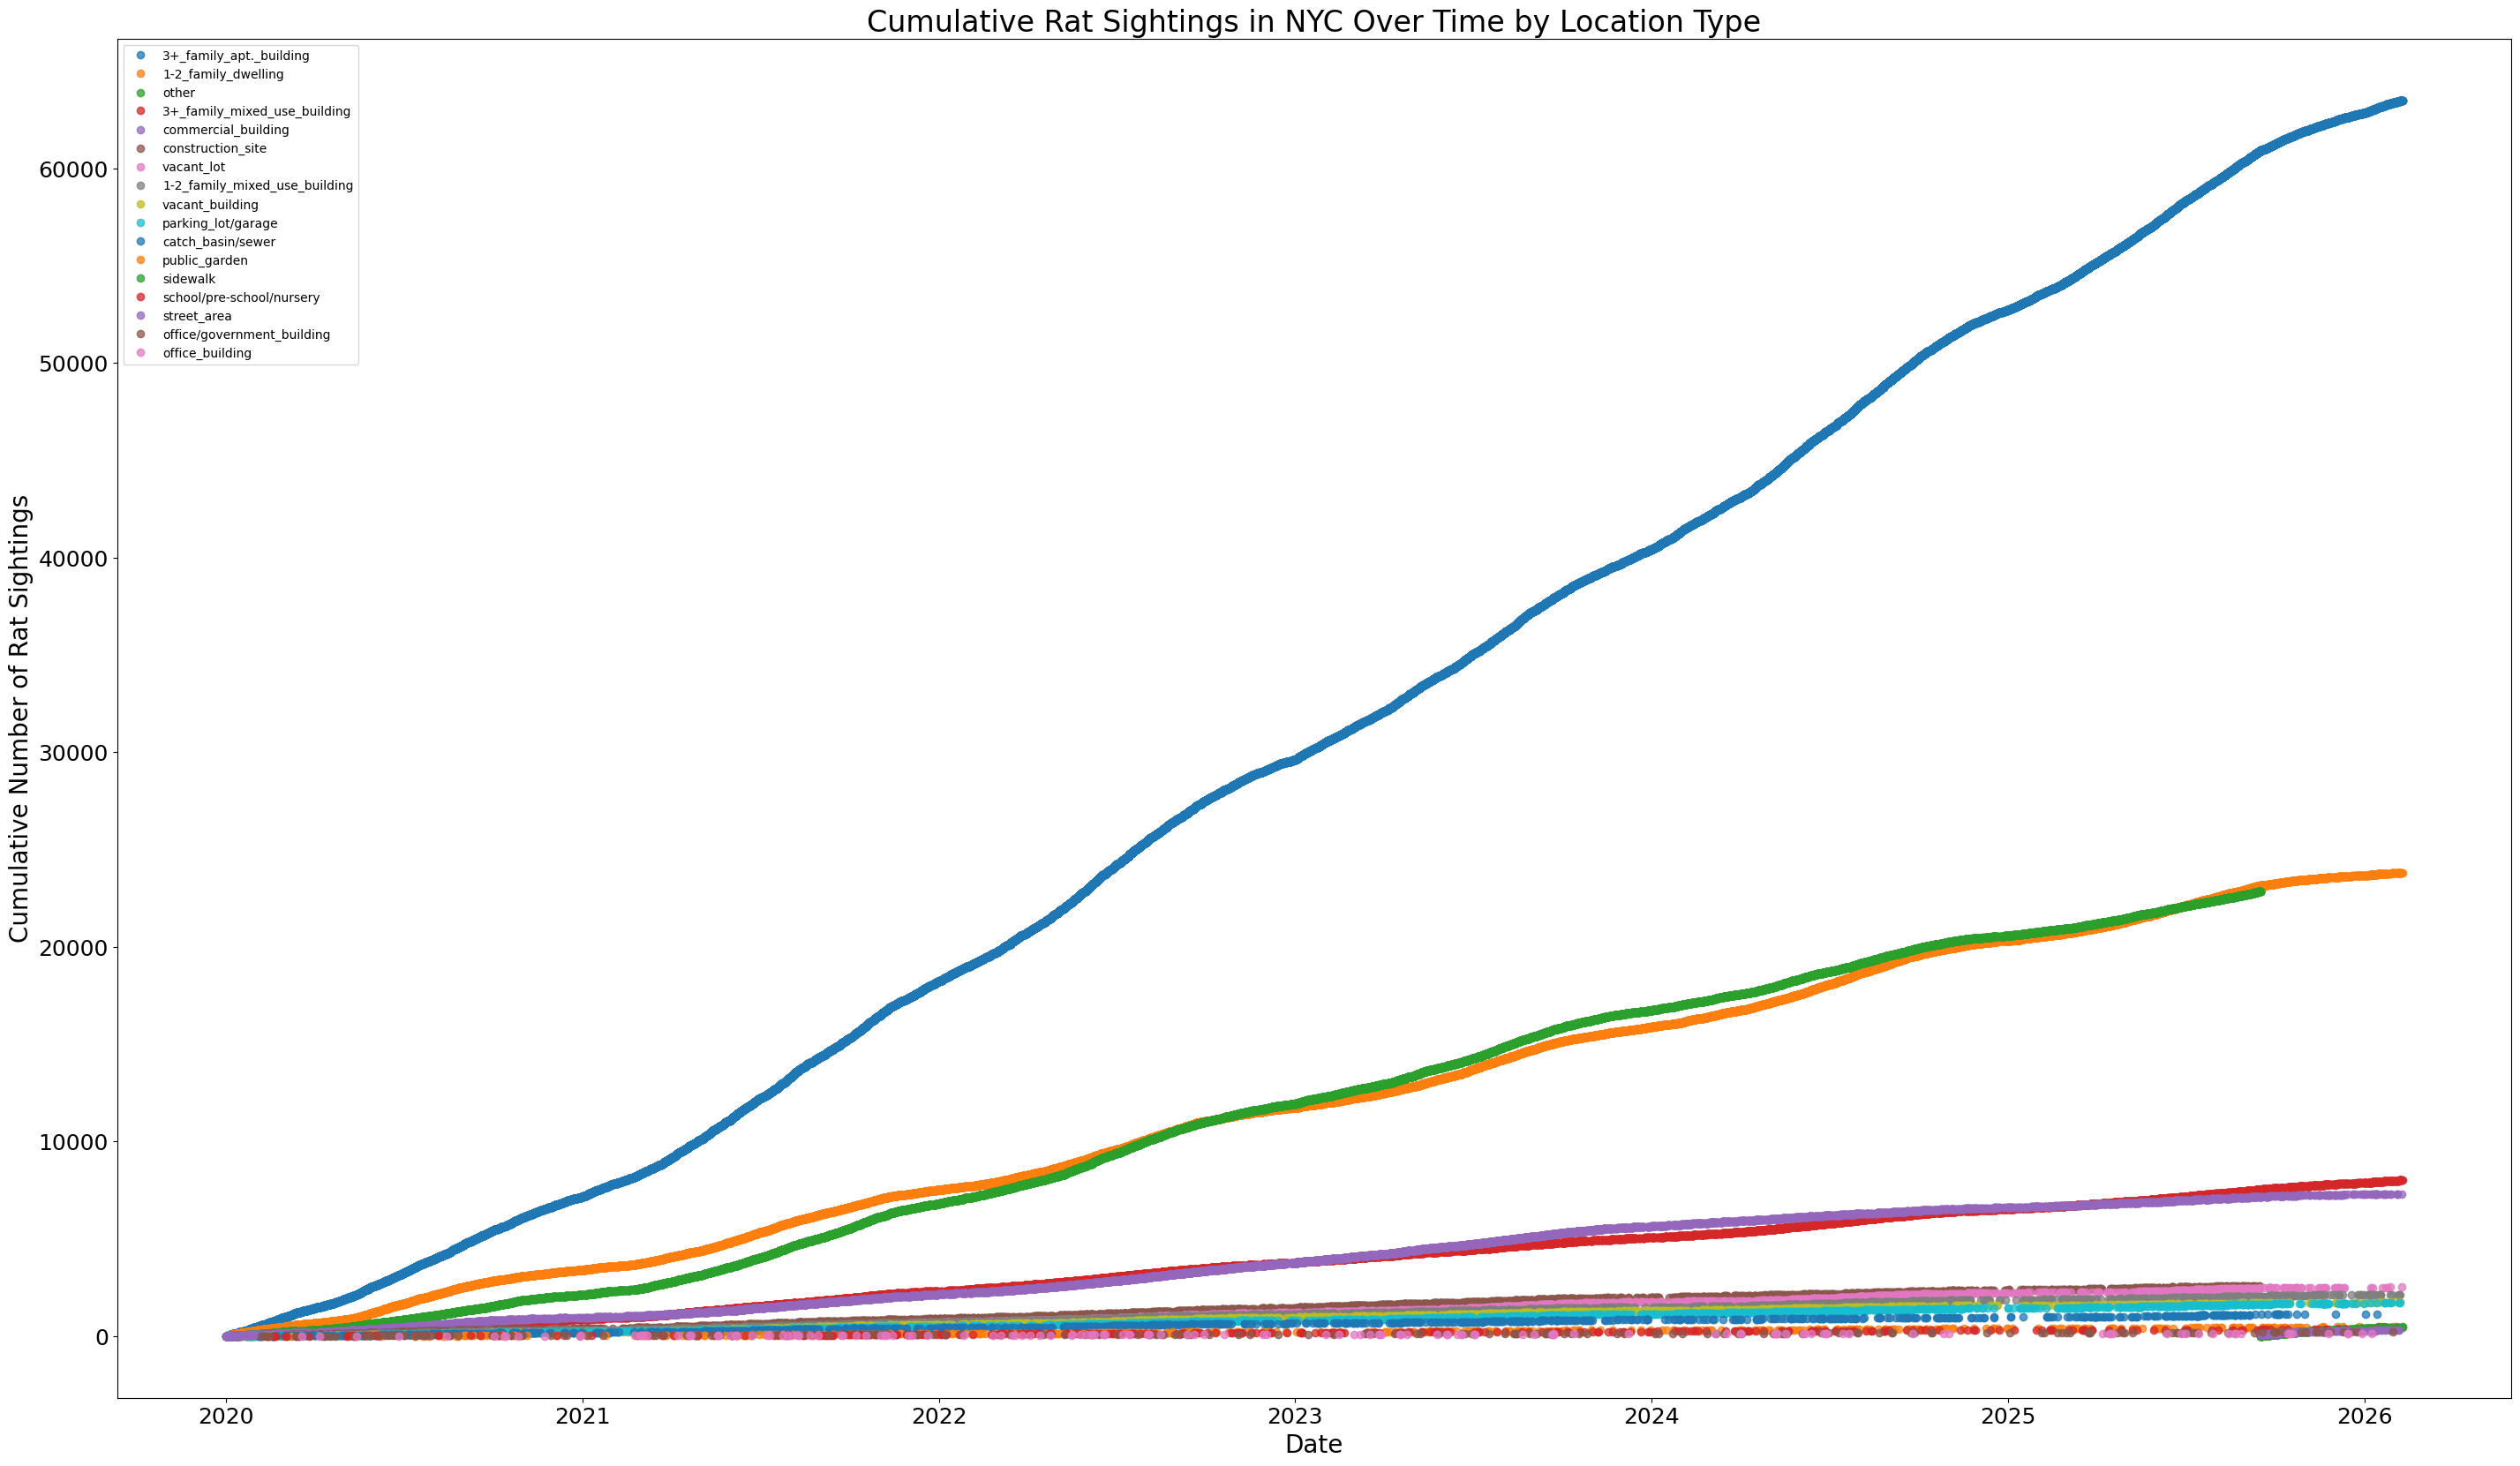

In [231]:
# Let's make a line plot of cumulative sightings by location type as well. 
# Let's not plot those with an insignificant number of sightings, so we filter out those with less than 100 sightings.
location_counts = rat_sight['location_type'].value_counts()
significant_locations = location_counts[location_counts >= 100].index
plt.figure(figsize=(35,20))
for location in significant_locations:
    location_data = rat_sight[rat_sight['location_type'] == location]
    location_data = location_data.sort_values('created_date')
    location_data['cumulative_count'] = np.arange(1, len(location_data) + 1)
    plt.plot(location_data['created_date'], location_data['cumulative_count'], 'o', alpha=0.75, label=location)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Cumulative Number of Rat Sightings", fontsize=20)
plt.title("Cumulative Rat Sightings in NYC Over Time by Location Type", fontsize=24)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

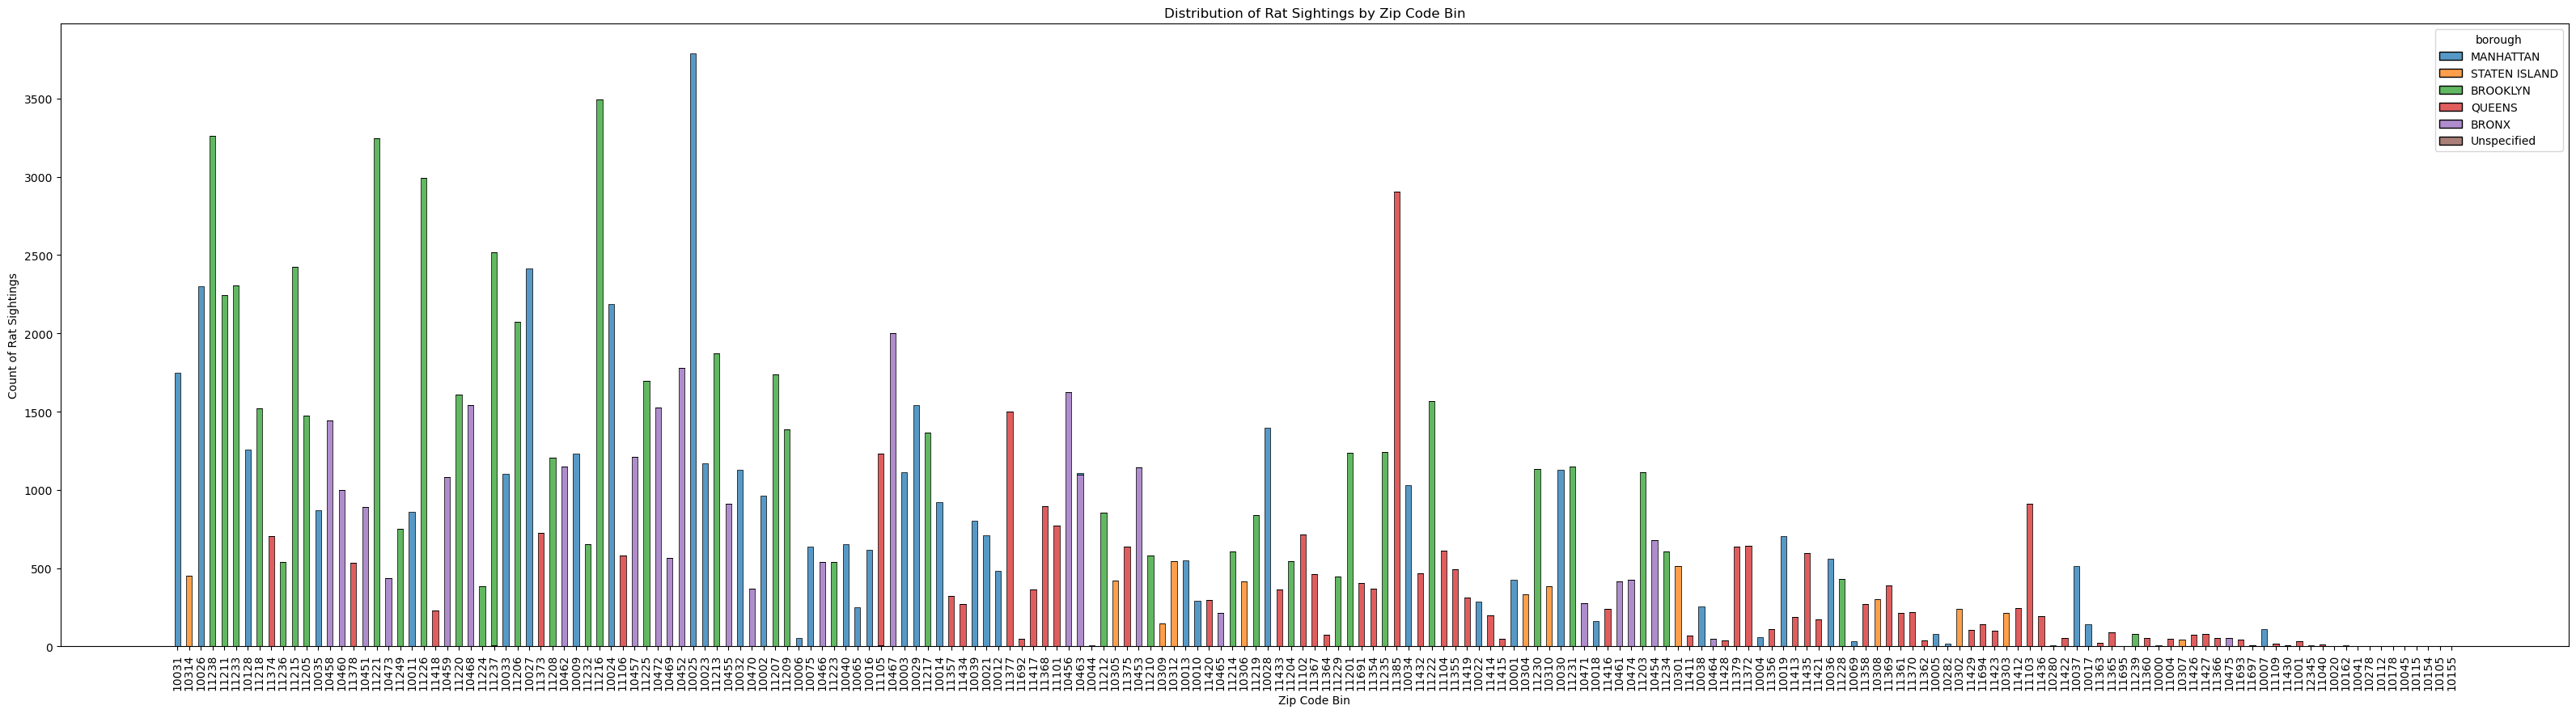

In [268]:
# Let's make a histogram of the number of rat sightings by Zip Code. 
# Go by binning the zip codes by the first 3 digits to reduce the number of bars in the histogram.
rat_sight['zip_code_bin'] = rat_sight['incident_zip'].astype(str).str[:5]
plt.figure(figsize=(40, 10))
sns.histplot(data=rat_sight, x='zip_code_bin', hue='borough', multiple="stack", shrink = 0.5)
plt.xlabel('Zip Code Bin')
plt.ylabel('Count of Rat Sightings')
plt.title('Distribution of Rat Sightings by Zip Code Bin')
plt.xticks(rotation=90)
plt.show()